# **Foundations of Data Science (CSF320) - Assignment 1**
### **Authors:** Anirudh A (2018B4A70936H), Vishal Kumar NK (2019A4PS0693H), Shivani Thirunagari (2019A4PS0754H)

# **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from random import randrange
import math
path = "/content/drive/MyDrive/FoDS-A1.csv"
df = pd.read_csv(path)
df.head()

,Strength,Temperature,Pressure
0,30.7,240,16
1,24.7,250,18
2,30.6,260,16
3,32.8,240,10
4,20.7,240,20


# **Data Pre-Processing**
### Data Shuffling

In [ ]:
df = df.sample(frac = 1) #frac denotes the fraction of samples to be returned. 
df.head()

,Strength,Temperature,Pressure
756,38.1,280,14
408,28.5,210,12
56,42.6,300,12
2,30.6,260,16
866,18.1,210,20


### Min-Max Normalization

In [ ]:
# It rescales the data to a range of [0,1]. 
# Subtract min value, divide by range.
for i in df.columns:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())   
df.head()

,Strength,Temperature,Pressure
756,0.707989,0.8,0.4
408,0.443526,0.1,0.2
56,0.831956,1.0,0.2
2,0.501377,0.6,0.6
866,0.157025,0.1,1.0


### 70-30 Training and Testing Split

In [ ]:
trdata = df.sample(frac=0.7, random_state=25) #Training data = 70%
tsdata = df.drop(trdata.index) #Testing data = 30%

print("Original data size:", df.shape[0])
print(f"No. of training examples: {trdata.shape[0]}")
print(f"No. of testing examples: {tsdata.shape[0]}")

Original data size: 1650
No. of training examples: 1155
No. of testing examples: 495


# **Construction of Matured Polynomial Features, Optimizing Weights using GD and SGD**


## Gradient Descent Algorithm - Polynomial of Degrees 0-9

In [ ]:
X = np.array(trdata.iloc[:, :2]) #Independent variables training data
y = np.array(trdata.iloc[:, 2:3])  #Dependent variable training data
Xtest = np.array(tsdata.iloc[:, :2]) #Independent variables testing data
ytest = np.array(tsdata.iloc[:, 2:3]) #Dependent variable testing data
X_max = X.max()
y_max = y.max()
Xtest_max = Xtest.max()
ytest_max = ytest.max()
X_min = X.min()
y_min = y.min()
Xtest_min = Xtest.min()
ytest_min = ytest.min()
m = y.shape[0]

In [ ]:
#Code for generating the feature vector (poly reg equation)
def featureVector(trdata, deg):
  arr = []
  index = 0
  for i in range(deg+1):
    for j in range(deg+1):
        if i+j<=deg:
          temp = (trdata.iloc[:,0]**i)*(trdata.iloc[:,1]**j) 
          arr.append(temp)
          index+=1
  return arr

In [ ]:
#Function to compute cost at each step of GD. 
def compute_cost(thetha, X, y):
  J = np.sum((np.matmul(X.T, thetha)-y)**2) #Sum of squares of error using vectorization
  J = J/2
  return J

In [ ]:
def gradientDescent(deg, eta):
  X = np.array(featureVector(trdata, deg))
  Xtest = np.array(featureVector(tsdata, deg))
  #X.shape = 3*1155
  W = np.zeros((int((deg+1)*(deg+2)/2),1))
  count = 0
  pE = 100000 #Error from previous iteration. 
  E = 10000 #Error from current iteration. 
  x_axis = [] #for the graph
  y_axis = []
  #Iterate till convergence. 
  print("Iteration: Error Value:")
  while abs(E-pE)>0.001:
    count = count+1 #Counts number of iterations. 
    pE = E 
    Yp = np.dot(X.T, W) #Predicted value
    W = W - ((eta/m)*np.dot(X, (Yp-y)))
    E = compute_cost(W, X, y) #Current iteration's error
    if count%50==0:
      x_axis.append(count)
      y_axis.append(E)
      print(count,"       ", E)
  Etest = compute_cost(W, Xtest, ytest)
  print("Degree of polynomial: ", deg, "Minimum Training Error: ", E, "Testing Error: ", Etest)
  plt.figure()
  plt.grid()
  plt.plot(x_axis, y_axis)
  plt.title("Cost Function using GD for Degree %i" %deg)
  plt.ylabel("Cost Value")
  plt.xlabel("Iteration Number")
  plt.show()

Iteration: Error Value:
50         67.74310812366674
Degree of polynomial:  0 Minimum Training Error:  67.74310812366674 Testing Error:  28.529728885055462


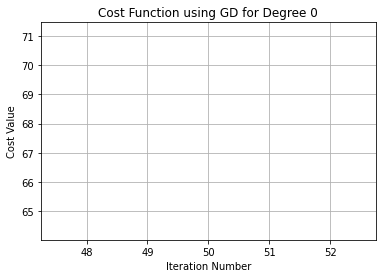

Iteration: Error Value:
50         68.92365818172289
100         62.49249018406292
150         57.84663781911135
200         54.07811203243771
250         50.809163194083524
300         47.87643418754348
350         45.20374414378762
400         42.750809334036745
450         40.49253836718189
500         38.410640103890486
550         36.49019256693765
600         34.71821301226116
650         33.08303734074213
700         31.574028784052636
750         30.181422342394328
800         28.896226823404895
850         27.710152794265113
900         26.615553480567097
950         25.605373198219432
1000         24.67310096003184
1050         23.812728142391677
1100         23.01870961087582
1150         22.28592792208601
1200         21.609660317784904
1250         20.98554827719311
1300         20.40956942259087
1350         19.878011593686487
1400         19.38744892226445
1450         18.93471975235299
1500         18.516906263381102
1550         18.131315664905863
1600         17.77546

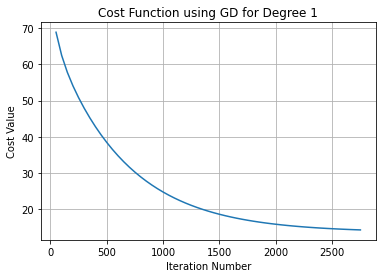

Iteration: Error Value:
50         64.67847697056622
100         54.83317015357507
150         48.461116519690044
200         43.37947364673593
250         39.13565484518985
300         35.56012301308193
350         32.54232491284738
400         29.99398687430893
450         27.841426895738902
500         26.02262650861693
550         24.4853047713432
600         23.185377131853283
650         22.085668517639096
700         21.15483006244667
750         20.366425911503505
800         19.69816319779295
850         19.13124271169343
900         18.649811341731898
950         18.240500334868514
1000         17.892035925596197
1050         17.594910991399473
1100         17.341108169849633
1150         17.12386637170478
1200         16.93748388851875
1250         16.7771523592682
1300         16.638816759436562
1350         16.519057334032787
1400         16.41499003525371
1450         16.32418256454223
1500         16.244583573352557
1550         16.174462960248597
1600         16.1123615

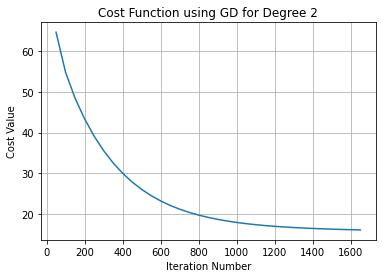

Iteration: Error Value:
50         60.422126882287515
100         49.69762938775221
150         42.79233872695434
200         37.5867826556934
250         33.599987859074936
300         30.535307304765933
350         28.171571464008643
400         26.341015968261654
450         24.91620459066806
500         23.800320444568346
550         22.919804798839124
600         22.21876631219854
650         21.65473430125069
700         21.195432893150148
750         20.816330642912174
800         20.498779196594988
850         20.22859939641142
900         19.99500726507813
950         19.789798164484665
1000         19.60672706537194
1050         19.441037784509515
1100         19.28910537897126
1150         19.148164495764643
1200         19.016103014225642
1250         18.891305285753432
1300         18.772533048530743
1350         18.658834960915733
1400         18.549477874246108
1450         18.443894619497968
1500         18.341644338402492
1550         18.242382343810718
1600         18

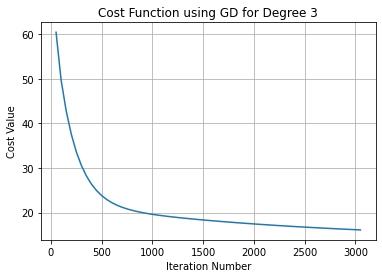

Iteration: Error Value:
50         57.36222883406245
100         46.57431955798485
150         39.83301795913156
200         35.169967948823135
250         31.8957237177981
300         29.56192258943207
350         27.866602460545245
400         26.606057521950184
450         25.64280071344287
500         24.88398415890117
550         24.266856257493036
600         23.748960150266242
650         23.30152726214311
700         22.905024007626995
750         22.546149587575854
800         22.215811783913374
850         21.90776194590209
900         21.617674322618825
950         21.34252494883529
1000         21.08017249686217
1050         20.829075317724985
1100         20.588100332698183
1150         20.356393884050526
1200         20.133294391510503
1250         19.918273224494683
1300         19.710894624581673
1350         19.5107884955041
1400         19.31763188905499
1450         19.13113637148075
1500         18.951039369605038
1550         18.777098212948754
1600         18.6090

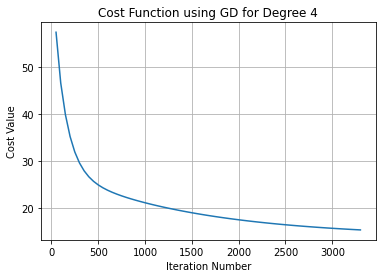

Iteration: Error Value:
50         55.35458508860353
100         44.83968340260445
150         38.63157123156843
200         34.658818476028856
250         32.01806207912516
300         30.179023680604594
350         28.827817714882812
400         27.77824414569595
450         26.919523372163454
500         26.185464998510348
550         25.536271125672673
600         24.947790048142984
650         24.405165137881298
700         23.899077831308396
750         23.42352259759616
800         22.97448728384887
850         22.54916898554182
900         22.145507008340452
950         21.76190382233397
1000         21.39705764303546
1050         21.04986142022755
1100         20.71934142580595
1150         20.40461952299997
1200         20.10488964920797
1250         19.819402869086577
1300         19.547457625546404
1350         19.288393167261205
1400         19.041584936617866
1450         18.80644118328268
1500         18.58240035698533
1550         18.368929006577396
1600         18.1655

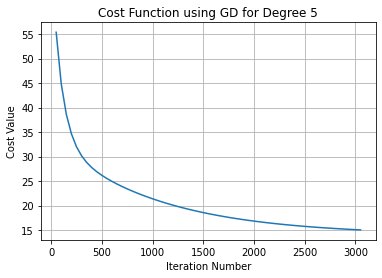

Iteration: Error Value:
50         54.10048985795722
100         44.020410206251185
150         38.42300182984214
200         35.00337624400347
250         32.73542685180408
300         31.09216429208697
350         29.800947344464262
400         28.719496278526496
450         27.772559137081934
500         26.919494360757497
550         26.13763738483328
600         25.413739842824885
650         24.739546423592774
700         24.10949815097363
750         23.519532038173345
800         22.966448286256565
850         22.447572714318863
900         21.960573693648776
950         21.503360544247197
1000         21.07402528612203
1050         20.670807740536056
1100         20.2920734022265
1150         19.93629843934956
1200         19.602058779614175
1250         19.28802162304377
1300         18.992938462375832
1350         18.715639092960465
1400         18.455026313452965
1450         18.210071140251436
1500         17.979808427043718
1550         17.763332819925303
1600         17.

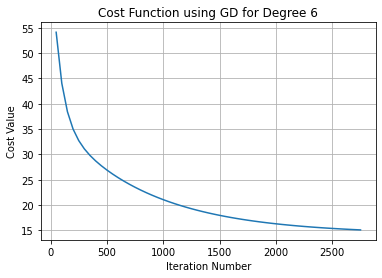

Iteration: Error Value:
50         53.359700869771615
100         43.76224532189966
150         38.6833883589654
200         35.59694294741024
250         33.459891244057026
300         31.805680006204796
350         30.421836959053984
400         29.208814252456584
450         28.117773995489
500         27.122988726238603
550         26.20949648072966
600         25.36752038429153
650         24.58991097167931
700         23.870951938452002
750         23.20578795444237
800         22.59014028189681
850         22.02015786037193
900         21.492333547231027
950         21.003452582990548
1000         20.550557596045028
1050         20.13092252897249
1100         19.74203170169997
1150         19.38156207895059
1200         19.047367720757727
1250         18.737465852131237
1300         18.450024222388635
1350         18.18334954780243
1400         17.935876897812083
1450         17.7061599224132
1500         17.492861840309985
1550         17.294747121124658
1600         17.1106738

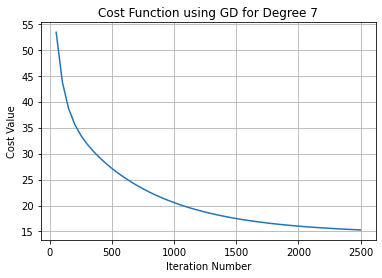

Iteration: Error Value:
50         52.96086852685481
100         43.81555166975397
150         39.099912117236705
200         36.1503456022725
250         33.984614411653496
300         32.21676553631707
350         30.68819786303203
400         29.32868590898568
450         28.103313398246083
500         26.991868050820898
550         25.980667318518773
600         25.05922328064123
650         24.218828929412886
700         23.451925506941194
750         22.75179640411735
800         22.112402403082825
850         21.528280892026885
900         20.994475841520014
950         20.506483847122762
1000         20.060209498987412
1050         19.65192684425439
1100         19.278245292402907
1150         18.936079050047127
1200         18.62261952536504
1250         18.33531031976554
1300         18.071824518891415
1350         17.830044049613228
1400         17.608040904414274
1450         17.404060059062793
1500         17.2165039283364
1550         17.043918220079817
1600         16.88

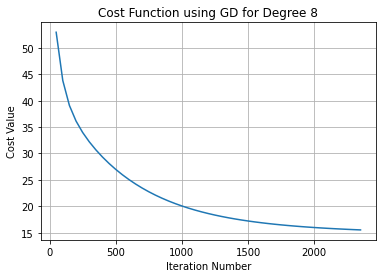

Iteration: Error Value:
50         52.78467383719395
100         44.01641866580873
150         39.50925493490256
200         36.558714089449786
250         34.282150923207794
300         32.368383364680376
350         30.69658895779556
400         29.212034993942943
450         27.884392989992143
500         26.693251420751043
550         25.622847363274616
600         24.660029668353534
650         23.79339923317495
700         23.012897568996625
750         22.30957578891127
800         21.67544186324019
850         21.103345631360895
900         20.58688475345419
950         20.12032418410505
1000         19.698525595999214
1050         19.316884812831347
1100         18.97127603577797
1150         18.65800199421212
1200         18.373749334883456
1250         18.115548674792386
1300         17.880738819749148
1350         17.66693470969962
1400         17.471998700695483
1450         17.29401483532394
1500         17.13126579022085
1550         16.98221222193974
1600         16.845

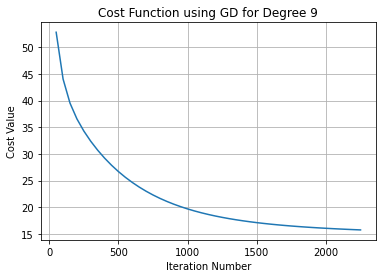

In [ ]:
import matplotlib.pyplot as plt 
eta = 0.1 #Learning rate
for deg in range(0, 10): 
  gradientDescent(deg, eta)

## Stochastic Gradient Descent Algorithm - Polynomial of Degrees 0-9

In [ ]:
def Stochastic_GD(deg,eta):
    X = np.array(featureVector(trdata, deg))
    Xtest = np.array(featureVector(tsdata, deg))
    ytest = np.array(tsdata.iloc[:, 2:3])
    W = np.zeros((int((deg+1)*(deg+2)/2),1))
    n_iter = 2000
    count = 0
    pE = 100000
    E = 10000
    x_axis = []
    y_axis = []
    print("Iteration: Error Value:")
    X = X.T
    while count < n_iter:
        count = count+1
        pE = Exception
        i = randrange(X.shape[0])
        yp = np.dot(X[i],W) #predicted_value
        diff = np.dot(X[i],W) - y[i]
        dW = X[i]*diff
        W = W - (eta/m)*(dW)
        E = compute_cost(W, X.T, y) #Current iteration's error
        if count%50==0:
          x_axis.append(count)
          y_axis.append(E)
          print(count,"       ", E)
    Etest = compute_cost(W, Xtest, ytest)
    print("Degree of polynomial: ", deg, "Minimum Training Error: ", E, "Testing Error: ", Etest)
    plt.figure()
    plt.grid()
    plt.plot(x_axis, y_axis)
    plt.title("Cost Function using SGD for Degree %i" %deg)
    plt.ylabel("Cost Value")
    plt.xlabel("Iteration Number")
    plt.show()

Iteration: Error Value:
50         215.5066753749115
100         214.26269753497024
150         213.06899456573038
200         211.78597566778384
250         210.47440791085256
300         209.07587964290596
350         207.73918577425258
400         206.8160673538997
450         205.6070235600432
500         204.34031628405017
550         203.30739179207433
600         202.26372882573975
650         201.06515909106133
700         199.7724005770292
750         198.61486741605148
800         197.35380718634607
850         196.1605946712761
900         194.84722188476022
950         193.72324353039744
1000         192.59973277379206
1050         191.37514454550555
1100         190.45614739133066
1150         189.35219163617097
1200         188.23042548016844
1250         187.3003317510245
1300         186.27848386586734
1350         184.92330225628214
1400         183.95750374517644
1450         182.91060475857617
1500         181.87313172101955
1550         180.92405836948316
1600      

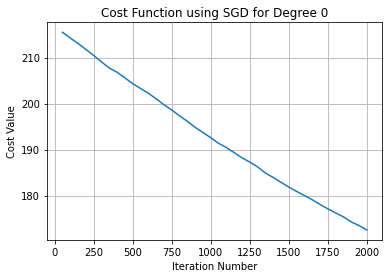

Iteration: Error Value:
50         645.8894116641253
100         641.303426392272
150         637.226490931138
200         632.4508756236869
250         628.5322164878826
300         623.8457229647091
350         619.4771872474513
400         615.3353650228144
450         610.8603865239857
500         606.9533765943502
550         602.7490281805883
600         597.9750660184243
650         593.8360091005244
700         589.5626560946455
750         586.2806757567048
800         583.0284976945973
850         580.2122368953828
900         576.0091491743553
950         571.4130364441232
1000         567.8919200243168
1050         564.7071029404133
1100         560.8845268167809
1150         557.1708616158867
1200         554.219813167405
1250         551.1858868349026
1300         548.3417638106248
1350         544.9816242554289
1400         542.0085985587712
1450         539.0143028941998
1500         535.8136945519024
1550         533.1772024245524
1600         529.789584926867
1650    

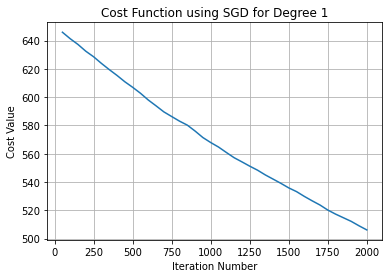

Iteration: Error Value:
50         1289.9459847985368
100         1282.138656476956
150         1273.8349890720744
200         1267.2151120168703
250         1260.124204730403
300         1252.1505383331041
350         1243.827433931816
400         1235.3403637934643
450         1225.4447811946798
500         1219.7577448088377
550         1210.433951925279
600         1200.3106920205182
650         1193.5835665252662
700         1186.0402309001743
750         1179.0237805518555
800         1172.4215893354817
850         1165.6036499235638
900         1157.6591565108151
950         1151.4379543903647
1000         1143.2890960465315
1050         1137.9687641564237
1100         1128.8788118905634
1150         1121.8393606660084
1200         1114.719439433812
1250         1108.00260967857
1300         1103.1309482845024
1350         1096.2110351203503
1400         1090.490788630724
1450         1084.1030013259588
1500         1077.2542586670656
1550         1070.9860803169563
1600        

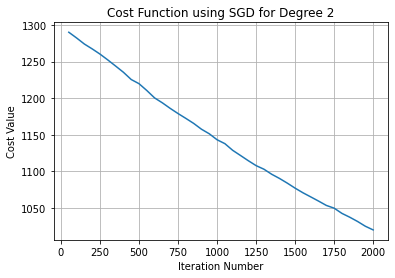

Iteration: Error Value:
50         2153.0407047291565
100         2137.521612393642
150         2123.214755765597
200         2104.8403303679806
250         2092.678596229519
300         2082.6205107653795
350         2071.17102213051
400         2058.241206101936
450         2044.9859733398512
500         2031.5342404545338
550         2020.6312598304096
600         2009.5597955780502
650         1998.748706162367
700         1987.6611010047955
750         1974.911972700996
800         1962.4851404628112
850         1950.2416462876274
900         1936.4621589126173
950         1925.6977586370786
1000         1916.0263045882052
1050         1905.317438859885
1100         1894.6281299310272
1150         1885.0933017582624
1200         1876.3125126363573
1250         1864.9634642290225
1300         1858.8610784236348
1350         1850.7660174066584
1400         1842.2826909803393
1450         1832.1196582326038
1500         1822.4898129330618
1550         1816.5436181858256
1600         

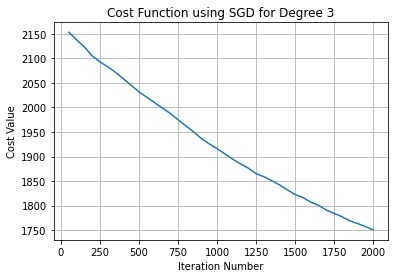

Iteration: Error Value:
50         3231.3687361619877
100         3205.501896380874
150         3181.7737521895438
200         3159.1195333734145
250         3143.74717102298
300         3120.2154970403226
350         3102.8260505235135
400         3080.0878462914297
450         3063.6314487847712
500         3045.1398933637192
550         3031.310650479811
600         3011.9452505967665
650         2998.388678663628
700         2982.612130410976
750         2967.3499451544812
800         2953.592982622103
850         2938.001502999202
900         2924.6819398098214
950         2911.094402881427
1000         2898.642570415536
1050         2885.1526165935875
1100         2871.3404811801242
1150         2857.696361451979
1200         2844.3365075141783
1250         2833.7469252046276
1300         2822.0287489937177
1350         2810.22613203547
1400         2800.6524282238624
1450         2790.714910956434
1500         2781.1266989050873
1550         2772.77657258486
1600         2760.75

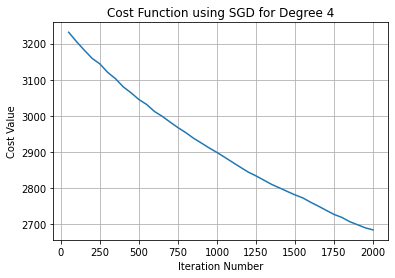

Iteration: Error Value:
50         4523.846005733719
100         4492.801160674081
150         4466.026993770891
200         4440.091833499304
250         4414.851647808826
300         4382.423014127551
350         4361.311240075876
400         4343.209357463414
450         4316.692571156311
500         4294.984984224855
550         4272.224542006825
600         4253.620574931638
650         4237.486183003182
700         4220.090794509197
750         4199.956718528834
800         4177.925872154904
850         4155.245396774055
900         4138.138638626716
950         4122.4949139483015
1000         4107.115341695082
1050         4097.471007565493
1100         4086.0090517099184
1150         4068.5866923343
1200         4053.240353929815
1250         4037.3911696396863
1300         4027.9372332432417
1350         4015.5304895153026
1400         3995.464953870561
1450         3985.025709497315
1500         3975.1546440160005
1550         3967.276170645326
1600         3949.0033856239197

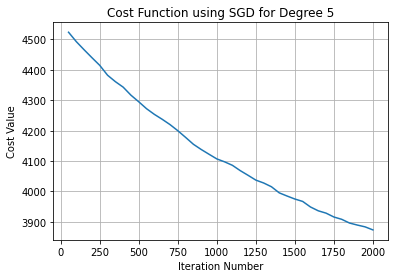

Iteration: Error Value:
50         6039.999641626
100         6000.464560751479
150         5969.651497515356
200         5937.97719243022
250         5904.4780215656065
300         5860.993271886575
350         5832.055788330487
400         5801.364256061499
450         5773.189136000262
500         5749.875091594204
550         5733.669547755624
600         5710.861215645941
650         5681.443850692893
700         5660.624421163252
750         5636.515211682595
800         5617.107690804115
850         5586.825536105125
900         5571.699672489265
950         5549.934173394286
1000         5525.757991161065
1050         5502.3335658568485
1100         5487.96880676303
1150         5466.13147921698
1200         5448.279603520768
1250         5435.821557883633
1300         5421.706197014302
1350         5401.891236932406
1400         5389.3985381775165
1450         5379.760017399348
1500         5361.97867660968
1550         5345.726374716844
1600         5331.83009861538
1650     

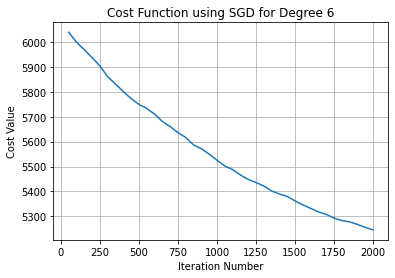

Iteration: Error Value:
50         7759.879191300585
100         7717.460015679622
150         7666.117117007652
200         7615.066866414356
250         7582.218356947147
300         7547.876236632524
350         7512.944877992211
400         7478.486200017912
450         7442.078332213864
500         7418.55187904947
550         7378.325079846789
600         7346.70629148379
650         7311.610740795454
700         7287.720917476309
750         7251.718238987939
800         7231.773933890552
850         7200.271810659355
900         7172.478067499238
950         7151.895974172303
1000         7128.245362402914
1050         7106.463483457942
1100         7081.116450586609
1150         7061.417181713061
1200         7040.997073454848
1250         7017.925926135249
1300         7008.22207164324
1350         6993.914921876667
1400         6979.348279996101
1450         6959.88226962986
1500         6940.647298327423
1550         6927.40003205856
1600         6917.323083623322
1650     

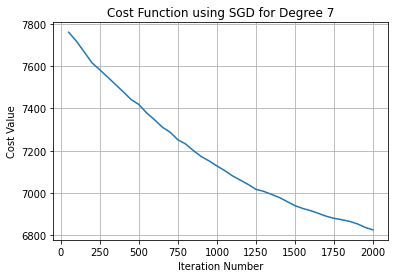

Iteration: Error Value:
50         9687.19666457608
100         9640.601064385439
150         9592.194901968556
200         9560.482810493588
250         9511.566087849675
300         9468.963383059963
350         9416.947900022702
400         9371.39028733967
450         9351.930948812056
500         9327.522128452902
550         9305.797913792478
600         9271.806377557956
650         9240.503419945155
700         9213.07759520891
750         9171.787429872322
800         9146.458137245329
850         9106.0982934342
900         9084.501150451288
950         9068.023679484024
1000         9043.014423601368
1050         9034.792945154892
1100         9015.340437151814
1150         8998.428315625817
1200         8981.113598427393
1250         8956.365450006471
1300         8924.967656179448
1350         8901.037459609068
1400         8882.461191084756
1450         8866.605720347376
1500         8840.239509125831
1550         8825.11316750126
1600         8814.054246272346
1650      

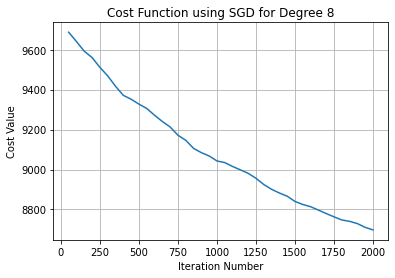

Iteration: Error Value:
50         11861.202895069135
100         11796.466528596544
150         11726.357929440901
200         11664.37850636195
250         11615.173332362001
300         11563.248608753187
350         11506.255465342478
400         11460.916692316547
450         11419.036151563034
500         11380.653510883045
550         11346.912851990703
600         11313.977305129363
650         11289.923536569444
700         11259.012052096456
750         11238.91113778337
800         11213.405651509604
850         11174.06159312808
900         11151.46711851469
950         11131.09169557292
1000         11110.718575609715
1050         11095.087734286424
1100         11074.905858239368
1150         11048.618187749857
1200         11021.984537338429
1250         11005.368961399841
1300         10975.041932254515
1350         10948.631076967162
1400         10931.600342734928
1450         10918.68736104491
1500         10896.264763339657
1550         10866.827949648916
1600      

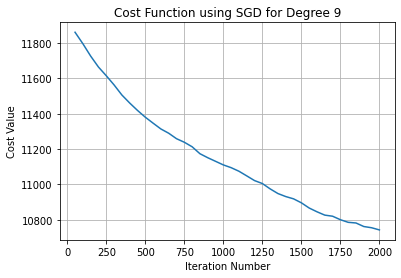

In [ ]:
import matplotlib.pyplot as plt 
eta = 0.1 #Learning rate
for deg in range(0, 10): 
  Stochastic_GD(deg, eta)

# **Ridge Regression - Polynomial of Degree 9**

In [ ]:
def cost_function_ridge(theta, X, Y, lam):
  m = X.shape[0]
  X = X.T
  pred = X.dot(theta)
  cost = (1/(2*m))*np.sum(np.square(Y-pred)) + lam*(np.sum(np.square(theta)))
  return cost

## Gradient Descent Algorithm - Ridge Regression

In [ ]:
def gradientDescent_ridge(deg, eta, lam):
  X = np.array(featureVector(trdata, deg))
  Xtest = np.array(featureVector(tsdata, deg))
  #X.shape = 3*1155
  W = np.zeros((int((deg+1)*(deg+2)/2),1))
  count = 0
  n_iter = 2000
  pE = 100000 #Error from previous iteration. 
  E = 10000 #Error from current iteration. 
  minE = E
  x_axis = [] #for the graph
  y_axis = []
  #Iterate till convergence. 
  print("Iteration: Error Value:")
  while count < n_iter:
    count = count+1 #Counts number of iterations. 
    pE = E 
    Yp = np.dot(X.T, W) #Predicted value
    W = W - ((eta/m)*((np.dot(X, (Yp-y))+2*lam*W)))
    E = cost_function_ridge(W, X, y, lam) #Current iteration's error
    if E < minE:
      minE = E
    if count%50==0:
      x_axis.append(count)
      y_axis.append(E)
      print(count,"       ", E)

  Etest = cost_function_ridge(W, Xtest, ytest, lam)
  print("Degree of polynomial: ", deg, "Training Error: ", E, "Testing Error: ", Etest)
  print("The minimum training error value is ", minE)
  Y_pred_train = (X.T).dot(W)
  Y_pred_test = (Xtest.T).dot(W)
  rmse_train = math.sqrt(np.mean(np.square(Y_pred_train - y)))   #calcuate and print train and test errors
  rmse_train = rmse_train*(y_max - y_min) + y_min
  rmse_test = math.sqrt(np.mean(np.square(Y_pred_test - ytest)))
  rmse_test = rmse_test*(ytest_max - ytest_min) + ytest_min

  print("Final training set RMSE : " + str(rmse_train))
  print("Final test set RMSE : " + str(rmse_test))
  print(W)
  plt.figure()
  plt.grid()
  plt.plot(x_axis, y_axis)
  plt.title("Cost Function for GD-Ridge degree 9 using %f" %lam)
  plt.ylabel("Cost Value")
  plt.xlabel("Iteration Number")
  plt.show()
  return [rmse_train,rmse_test]

[0.         0.00526316 0.01052632 0.01578947 0.02105263 0.02631579
 0.03157895 0.03684211 0.04210526 0.04736842 0.05263158 0.05789474
 0.06315789 0.06842105 0.07368421 0.07894737 0.08421053 0.08947368
 0.09473684 0.1       ]
Iteration: Error Value:
50         0.9597213424944354
100         0.8002985211965223
150         0.718350089725501
200         0.6647038925354506
250         0.6233118349674144
300         0.5885160611760069
350         0.5581197992326465
400         0.5311279089807808
450         0.5069889634544026
500         0.4853318440136553
550         0.46586995205953846
600         0.44836417578824606
650         0.43260725878499906
700         0.41841631943630225
750         0.4056286507074776
800         0.39409894296800346
850         0.3836971932974708
900         0.37430699551734886
950         0.3658240760746373
1000         0.3581550108363493
1050         0.35121608750602445
1100         0.3449322915595994
1150         0.33923639989476584
1200         0.3340681697251

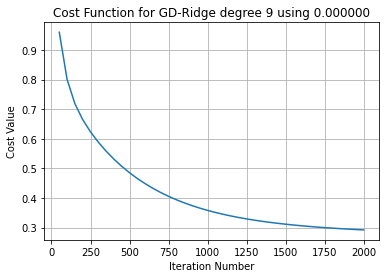

Iteration: Error Value:
50         0.0027269499446495524
100         0.0012654035200165205
150         0.0006714846746984173
200         0.00041328995218148774
250         0.00029965364593616197
300         0.0002482557148775789
350         0.0002236949995731349
400         0.00021077200958248874
450         0.00020297332684366664
500         0.00019751287468676643
550         0.00019319944332365255
600         0.00018952146101305724
650         0.0001862553772536412
700         0.00018329885681514534
750         0.00018060021502812546
800         0.0001781288702761328
850         0.00017586315780609133
900         0.0001737854139462258
950         0.00017188005415615156
1000         0.0001701328508922444
1050         0.00016853067089029914
1100         0.00016706137441629233
1150         0.0001657137624490889
1200         0.0001644775318233386
1250         0.00016334322699019366
1300         0.000162302187231565
1350         0.00016134649113941945
1400         0.0001604689005382441
14

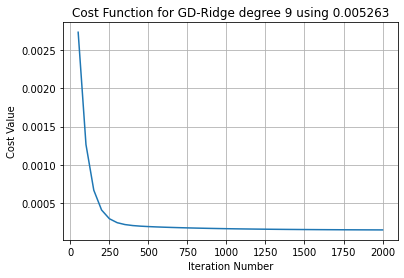

Iteration: Error Value:
50         0.02095805599458237
100         0.01023608819187513
150         0.005893191132671675
200         0.004021420953012361
250         0.0032084392532506336
300         0.0028476574964801135
350         0.002679479763741376
400         0.0025932805098015247
450         0.0025421986805057046
500         0.002506547047768389
550         0.0024781417426873774
600         0.0024536193251258878
650         0.0024316052315074767
700         0.002411526179126693
750         0.0023931200290456455
800         0.002376238731157127
850         0.002360772555940792
900         0.0023466232690358252
950         0.0023336962116255154
1000         0.002321899102027714
1050         0.0023111428105247363
1100         0.002301342392451086
1150         0.0022924178574857523
1200         0.0022842945917493918
1250         0.0022769034886622797
1300         0.002270180871951125
1350         0.002264068284651189
1400         0.0022585121998886138
1450         0.0022534636923669

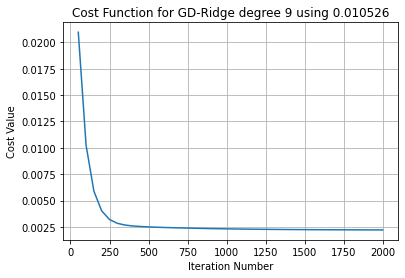

Iteration: Error Value:
50         0.01184292056367676
100         0.006051706954764095
150         0.003713736886555581
200         0.0027150059983407455
250         0.0022872222653876075
300         0.0021012790084171816
350         0.0020170215402576506
400         0.001975180166565168
450         0.0019509495727862108
500         0.0019341083665814249
550         0.001920540529916815
600         0.0019086429440688228
650         0.0018978186937960587
700         0.001887855420663785
750         0.0018786756871346634
800         0.0018702413502024386
850         0.0018625201115457554
900         0.0018554760932684225
950         0.001849068948540482
1000         0.0018432554615281942
1050         0.0018379914470792588
1100         0.0018332332800407966
1150         0.001828938944711459
1200         0.0018250686744379302
1250         0.0018215852878780195
1300         0.0018184543173670306
1350         0.001815644002468614
1400         0.0018131252006587109
1450         0.00181087125

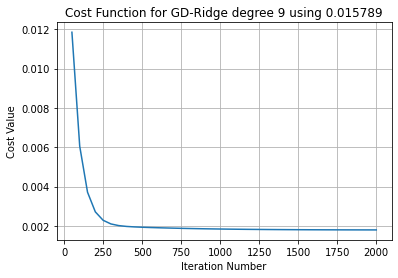

Iteration: Error Value:
50         0.014346398045533486
100         0.007632190595681607
150         0.004930712428032411
200         0.0037872400694570494
250         0.0033046133961303977
300         0.003099539897839821
350         0.0030095980532410323
400         0.0029666396304647794
450         0.0029425012140487992
500         0.002925817659030974
550         0.0029121751905935686
600         0.0028999665845245133
650         0.0028886710767927056
700         0.0028781569641878665
750         0.0028684099624609384
800         0.002859435064497418
850         0.002851226558713645
900         0.002843763064741984
950         0.0028370104902889054
1000         0.0028309265307741526
1050         0.0028254646147736176
1100         0.00282057681996101
1150         0.0028162158356427915
1200         0.0028123361884900082
1250         0.0028088949447704335
1300         0.00280585205903927
1350         0.002803170493079844
1400         0.0028008161909940563
1450         0.00279875796825

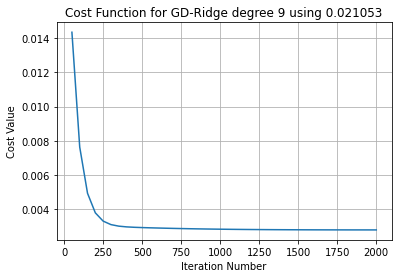

Iteration: Error Value:
50         0.014080648830196232
100         0.007766296620105606
150         0.005234405194009134
200         0.004172817157150766
250         0.0037316695588960965
300         0.003548840920469632
350         0.003471650452214405
400         0.003436550919923269
450         0.003417624869042095
500         0.0034046475583625634
550         0.0033938102259377764
600         0.0033838414453538504
650         0.0033744150279473363
700         0.003365516441165035
750         0.003357204329638706
800         0.0033495303729308137
850         0.0033425194934782864
900         0.003336170881397822
950         0.0033304645832292214
1000         0.0033253682586986484
1050         0.0033208425551748467
1100         0.0033168449409136883
1150         0.003313332262572807
1200         0.0033102623600356337
1250         0.0033075950248958154
1300         0.0033052925190672645
1350         0.0033033198072311464
1400         0.0033016446084098254
1450         0.0033002373371

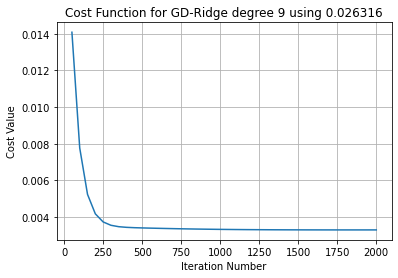

Iteration: Error Value:
50         0.014820672728385761
100         0.008445311588351167
150         0.005897882901402371
200         0.004840176182883992
250         0.004407827509394727
300         0.00423351904668534
350         0.004163164837090602
400         0.004133160286716745
450         0.004117920906737085
500         0.004107598611581561
550         0.0040986987251037275
600         0.004090183719189664
650         0.004081891956558239
700         0.004073920849616286
750         0.004066403500142952
800         0.004059440248811
850         0.004053087310172379
900         0.0040473636453718575
950         0.004042261518794674
1000         0.004037755908778297
1050         0.00403381163968951
1100         0.004030388370392055
1150         0.004027443906011779
1200         0.0040249363018736595
1250         0.004022825136646715
1300         0.004021072231307825
1350         0.004019642007348343
1400         0.004018501615648604
1450         0.004017620923615015
1500        

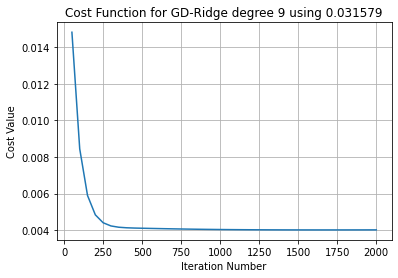

Iteration: Error Value:
50         0.015217790630455424
100         0.008931961834110892
150         0.00642924736899716
200         0.0054005552111473405
250         0.004987359373065791
300         0.004825800321740471
350         0.004764026484866704
400         0.004739884264589681
450         0.004728732901152385
500         0.004721338853387146
550         0.004714607958447922
600         0.004707763803457074
650         0.004700814955342133
700         0.004693969688710063
750         0.004687433216108397
800         0.00468135268560177
850         0.004675814606973216
900         0.004670857474358407
950         0.004666486084127752
1000         0.004662683405317342
1050         0.004659419319180797
1100         0.00465665665694073
1150         0.0046543551952548615
1200         0.004652474204494662
1250         0.0046509740096135795
1300         0.004649816894457825
1350         0.004648967578498545
1400         0.0046483934207088495
1450         0.004648064453439217
1500     

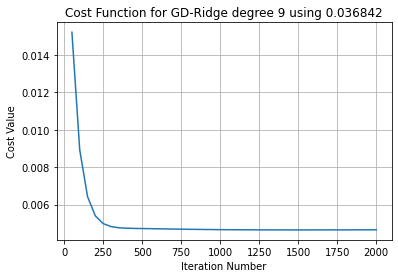

Iteration: Error Value:
50         0.015734447390205485
100         0.009487760197296538
150         0.007009655361555281
200         0.006001666231003376
250         0.005604250054474887
300         0.005454096611462866
350         0.0054003714086438385
400         0.005381871283385379
450         0.005374699123021328
500         0.005370159770083836
550         0.005365533153937165
600         0.005360296594779787
650         0.005354628128319592
700         0.005348848013894723
750         0.005343234853243257
800         0.0053379835388938125
850         0.005333211411075616
900         0.005328976703849346
950         0.005325296720142204
1000         0.00532216224429028
1050         0.005319547950537993
1100         0.005317419532725739
1150         0.005315738411653977
1200         0.005314464745587023
1250         0.005313559289675806
1300         0.005312984491760564
1350         0.005312705090730551
1400         0.005312688396574322
1450         0.005312904370971397
1500     

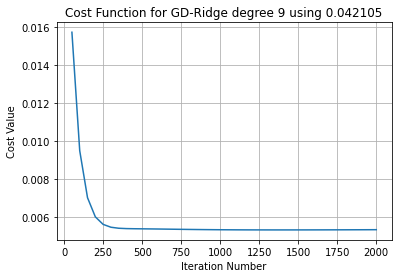

Iteration: Error Value:
50         0.016209776665980308
100         0.010018952338847205
150         0.0075720970954972055
200         0.0065875201901769605
250         0.006206956883935115
300         0.006068617580532651
350         0.006023089021712873
400         0.00601028299880926
450         0.006007110601264965
500         0.006005438745522971
550         0.006002929002664179
600         0.005999313989429763
650         0.005994940830363218
700         0.005990240967110449
750         0.005985565674971972
800         0.005981157085331573
850         0.005977163063214187
900         0.005973661431278951
950         0.00597068195546251
1000         0.005968223262186831
1050         0.0059662648885151865
1100         0.005964775484945515
1150         0.005963718222155345
1200         0.005963054255669392
1250         0.00596274487881725
1300         0.0059627528070386425
1350         0.005963042896212155
1400         0.00596358249807768
1450         0.005964341587284738
1500      

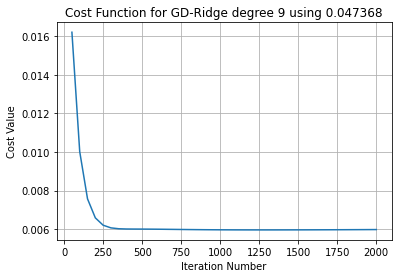

Iteration: Error Value:
50         0.01669940314258709
100         0.010558864980232948
150         0.00814104555318471
200         0.007178979346600294
250         0.006814911840193669
300         0.00668825003131145
350         0.006650867575823109
400         0.0066437367708264295
450         0.0066445556386954575
500         0.006645745396869804
550         0.006645346784474588
600         0.006643347192481216
650         0.006640262939982169
700         0.006636636891569066
750         0.006632893208978316
800         0.0066293214095265
850         0.006626099968526858
900         0.006623326336136299
950         0.0066210427484500855
1000         0.006619255661063128
1050         0.0066179494492218435
1100         0.006617095689344345
1150         0.006616659268781314
1200         0.0066166023069097945
1250         0.006616886602971314
1300         0.0066174751096278765
1350         0.0066183327716271305
1400         0.006619426956727217
1450         0.006620727629188543
1500    

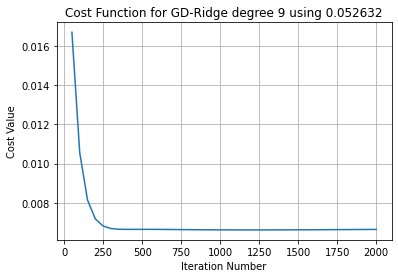

Iteration: Error Value:
50         0.017184079532021654
100         0.011095671725606172
150         0.008707610070918846
200         0.007768337528377866
250         0.007420868890612241
300         0.007305916877354111
350         0.007276686859282304
400         0.007275229387018333
450         0.007280036000025555
500         0.007284084337034782
550         0.00728579474099923
600         0.007285409249985264
650         0.0072836131181304945
700         0.007281060390461006
750         0.007278247929386191
800         0.007275512509622661
850         0.00727306313445899
900         0.0072710168331810154
950         0.007269428287291193
1000         0.007268311772617759
1050         0.0072676565038751325
1100         0.007267436991038672
1150         0.007267619849497235
1200         0.007268168175826345
1250         0.007269044289364447
1300         0.007270211394287712
1350         0.007271634538155744
1400         0.007273281118066494
1450         0.007275121100440348
1500     

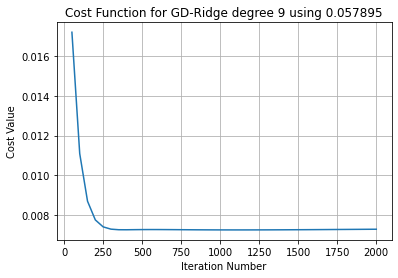

Iteration: Error Value:
50         0.017670455778000017
100         0.011633554491121328
150         0.009274999873905336
200         0.008358415838862479
250         0.008027501477708998
300         0.00792423960376431
350         0.007903152560116273
400         0.007907363116815651
450         0.007916153891077722
500         0.007923057968472995
550         0.007926874908242182
600         0.007928101238230458
650         0.007927591078559549
700         0.007926109618976222
750         0.007924226399785713
800         0.007922325436062088
850         0.007920646245355519
900         0.007919325424888947
950         0.007918430092551021
1000         0.00791798233729526
1050         0.007917976207854619
1100         0.0079183891437158
1150         0.007919189485421094
1200         0.00792034130480247
1250         0.007921807440106694
1300         0.007923551346430018
1350         0.00792553817401314
1400         0.007927735349519634
1450         0.007930112842026245
1500         0.0

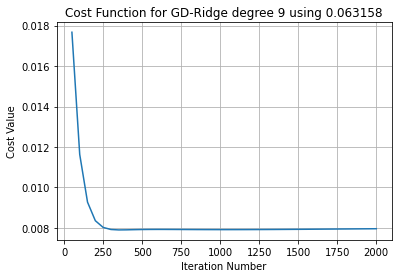

Iteration: Error Value:
50         0.01815623591067361
100         0.012171038202849475
150         0.009842062179365566
200         0.008948188628864678
250         0.008633831256653117
300         0.008542255724069971
350         0.008529306398586806
400         0.008539180068023584
450         0.008551950908157292
500         0.00856170744026476
550         0.008567628277531868
600         0.00857046425623101
650         0.008571238206894106
700         0.008570826344036718
750         0.008569870798705626
800         0.00856880276559627
850         0.00856789223573911
900         0.008567295348036935
950         0.008567091640822649
1000         0.008567311007422543
1050         0.008567952326761951
1100         0.008568995967327355
1150         0.008570411996482875
1200         0.008572165464373723
1250         0.008574219732052534
1300         0.008576538509897787
1350         0.008579087055402385
1400         0.008581832829403455
1450         0.008584745808165232
1500         0.

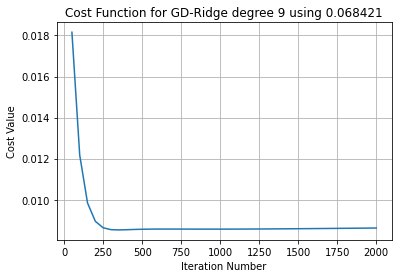

Iteration: Error Value:
50         0.01864221191101073
100         0.012708641846624753
150         0.01040920921379279
200         0.009538026513136219
250         0.009240213728402202
300         0.009160315952843938
350         0.009155498050475984
400         0.009171030046490362
450         0.009187777212297875
500         0.009200383195771983
550         0.009208405443376979
600         0.00921284893811422
650         0.009214905102093796
700         0.009215561088011668
750         0.009215531555454038
800         0.00921529483485424
850         0.009215151360449701
900         0.00921527679254251
950         0.009215763076881059
1000         0.009216647903338376
1050         0.009217934976895225
1100         0.009219607593482991
1150         0.009221637547512177
1200         0.009223990868867198
1250         0.009226631443620443
1300         0.009229523240140248
1350         0.009232631626164858
1400         0.009235924099837488
1450         0.009239370647779507
1500         0.

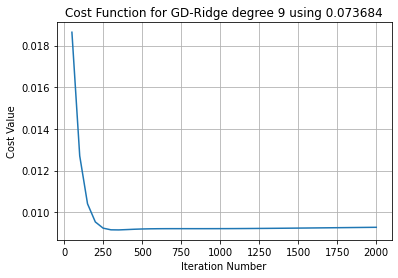

Iteration: Error Value:
50         0.019128110786753687
100         0.01324618320996205
150         0.010976294125945061
200         0.010127796256751535
250         0.009846520481010208
300         0.009778293311314032
350         0.00978160076680898
400         0.009802786178101933
450         0.00982350575380463
500         0.009838958050853604
550         0.009849079142238839
600         0.009855127985657313
650         0.009858464461192873
700         0.009860186560356919
750         0.009861081399685428
800         0.009861674395165441
850         0.009862296390034647
900         0.00986314254345407
950         0.009864317194424209
1000         0.009865865821132122
1050         0.009867796950523491
1100         0.009870096804735183
1150         0.00987273890591201
1200         0.00987569026563745
1250         0.00987891529777304
1300         0.00988237823193204
1350         0.009886044549613312
1400         0.009889881789885901
1450         0.009893859953346159
1500         0.009

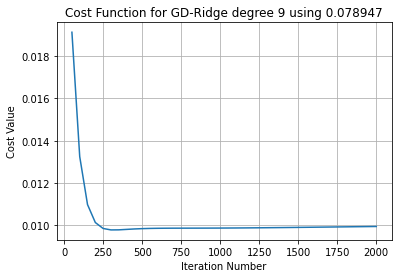

Iteration: Error Value:
50         0.019614026551325717
100         0.01378372612240149
150         0.011543369037744923
200         0.01071754553367832
250         0.01045279765933885
300         0.010396233527688505
350         0.010407660244578862
400         0.010434494234759959
450         0.010459182387452592
500         0.010477477923270351
550         0.01048969533232272
600         0.010497347379831537
650         0.01050196227616491
700         0.01050474875722717
750         0.010506566328511317
800         0.010507987443792048
850         0.010509373322626726
900         0.01051093860139238
950         0.010512799998652214
1000         0.010515010772872651
1050         0.010517584268898041
1100         0.010520509633750032
1150         0.010523762117854328
1200         0.010527309716280823
1250         0.010531117373264686
1300         0.010535149582733116
1350         0.010539371943280754
1400         0.01054375203835183
1450         0.010548259885976952
1500         0.010

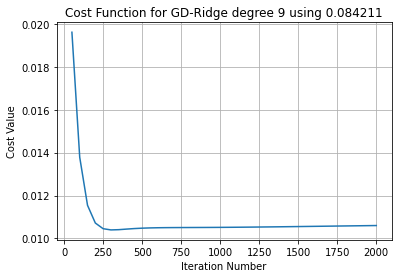

Iteration: Error Value:
50         0.02009992683714692
100         0.014321248251498449
150         0.012110415494898582
200         0.01130725734628303
250         0.011059028754874469
300         0.011014120218040657
350         0.01103366010106292
400         0.011066137803201717
450         0.011094790669216405
500         0.011115926346450571
550         0.011130237533062042
600         0.011139490632669571
650         0.011145382056069962
700         0.011149231187385736
750         0.011151969851824524
800         0.01115421749235715
850         0.011156365671668578
900         0.011158648481415092
950         0.011161195005883473
1000         0.011164066275727191
1050         0.011167280449621831
1100         0.011170829598185116
1150         0.011174690700719815
1200         0.011178832737627343
1250         0.01118322118616069
1300         0.011187820807688272
1350         0.011192597321290234
1400         0.01119751835828528
1450         0.01120255395764223
1500         0.01

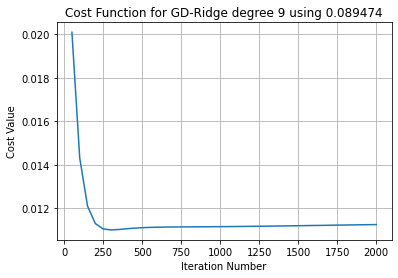

Iteration: Error Value:
50         0.020585822766173573
100         0.01485875738332063
150         0.01267744000172048
200         0.011896937726853253
250         0.011665219649755795
300         0.011631959234106922
350         0.011659606196798195
400         0.011697722761638454
450         0.011730336493683251
500         0.011754309227588314
550         0.01177071166068215
600         0.011781563666759772
650         0.011788729728118078
700         0.011793639781667876
750         0.01179729790362944
800         0.011800370477947405
850         0.0118032793774832
900         0.011806278127385564
950         0.01180950816391323
1000         0.011813038281860108
1050         0.011816891449683882
1100         0.011821062660310095
1150         0.011825530622504252
1200         0.011830265303827098
1250         0.011835232717172432
1300         0.011840397894454084
1350         0.011845726678603414
1400         0.011851186752289017
1450         0.01185674817889849
1500         0.011

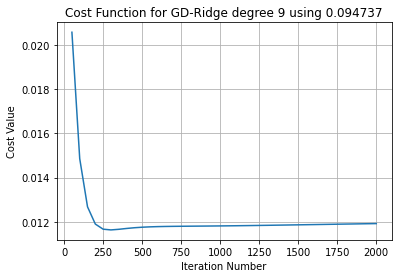

Iteration: Error Value:
50         0.021071710505073345
100         0.015396250793458102
150         0.013244440259983007
200         0.012486584534661473
250         0.012271368254893179
300         0.01224974849948009
350         0.01228549645543846
400         0.012329247030920197
450         0.012365817779242533
500         0.012392624483720579
550         0.0124111156319284
600         0.012423564399369622
650         0.012432003210673937
700         0.012437972459933352
750         0.01244254840556366
800         0.012446444324193541
850         0.012450112365875123
900         0.01245382546744893
950         0.012457737403392488
1000         0.01246192472459855
1050         0.012466415205265693
1100         0.01247120675934789
1150         0.012476279825667297
1200         0.012481605360778737
1250         0.012487149915845442
1300         0.012492878796434617
1350         0.012498757972696952
1400         0.012504755182127026
1450         0.012510840516011175
1500         0.012

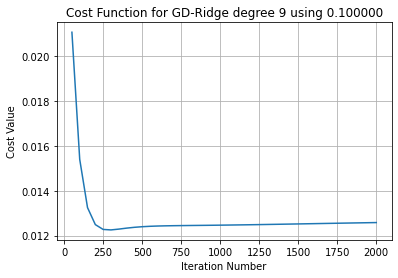

Lambda Values:  [0.         0.00526316 0.01052632 0.01578947 0.02105263 0.02631579
 0.03157895 0.03684211 0.04210526 0.04736842 0.05263158 0.05789474
 0.06315789 0.06842105 0.07368421 0.07894737 0.08421053 0.08947368
 0.09473684 0.1       ]
RMSE for Training Data:  [0.1668153639267674, 0.0008636047296009085, 0.002352159715989332, 0.0017384095169567916, 0.001882432720491349, 0.0018359400021223378, 0.0018553927605271146, 0.0018529840153256663, 0.0018579753761246173, 0.0018605096086265582, 0.0018638957480901408, 0.001867021466721501, 0.0018702602925882597, 0.0018734865513646308, 0.0018767422973837934, 0.0018800132326553805, 0.001883303992524865, 0.0018866128519102227, 0.0018899402230899934, 0.0018932858008249424]
RMSE for Testing Data:  [0.1694461280217099, 0.4607579952458275, 0.33997265175596497, 0.3675306897596526, 0.3578585276116225, 0.3610472309878919, 0.359974463342444, 0.36033667514592593, 0.36021816220534647, 0.36026097006317803, 0.36024967335430774, 0.3602565237337795, 0.360257286

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


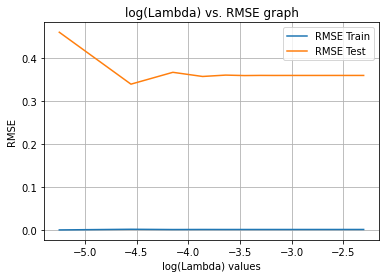

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


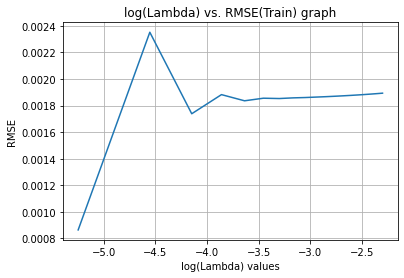

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


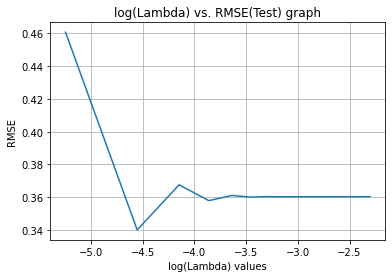

In [ ]:
import matplotlib.pyplot as plt 
arrRMS_train = []
arrRMS_test = []
eta = 0.1 #Learning rate
arr = np.linspace(0,0.1,20) #lambda values
print(arr)
deg = 9
for i in arr: 
 [x,y] = gradientDescent_ridge(deg, eta, i)
 arrRMS_train.append(x)
 arrRMS_test.append(y)

print("Lambda Values: ", arr)
print("RMSE for Training Data: ", arrRMS_train)
print("RMSE for Testing Data: ", arrRMS_test)
print("Minimum RMSE Train: ", min(arrRMS_train))
print("Minimum RMSE Test: ", min(arrRMS_test))

print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_train)
plt.plot(np.log(arr), arrRMS_test)
plt.title("log(Lambda) vs. RMSE graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.legend(["RMSE Train", "RMSE Test"])
plt.show()


print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_train)
plt.title("log(Lambda) vs. RMSE(Train) graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.show()


print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_test)
plt.title("log(Lambda) vs. RMSE(Test) graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.show()




## Stochastic Gradient Descent Algorithm - Ridge Regression

In [ ]:
def Stochastic_GD_ridge(deg,eta, lam):
    X = np.array(featureVector(trdata, deg))
    Xtest = np.array(featureVector(tsdata, deg))
    ytest = np.array(tsdata.iloc[:, 2:3])
    W = np.zeros((int((deg+1)*(deg+2)/2),1))
    n_iter = 2000
    count = 0
    pE = 100000
    E = 10000
    minE = E
    x_axis = []
    y_axis = []
    print("Iteration: Error Value:")
    X = X.T
    while count < n_iter:
        count = count+1
        pE = E
        i = randrange(X.shape[0])
        yp = np.dot(X[i],W) #predicted_value
        diff = np.dot(X[i],W) - y
        dW = X[i]*diff
        W = W - ((eta/m)*(dW+2*lam*W))
        E = cost_function_ridge(W, X.T, y, lam) #Current iteration's error
        if E < minE:
          minE = E
        if count%50==0:
          x_axis.append(count)
          y_axis.append(E)
          print(count,"       ", E)
    Etest = cost_function_ridge(W, Xtest, ytest, lam)
    print("Degree of polynomial: ", deg, "Training Error: ", E, "Testing Error: ", Etest)
    print("The minimum training error value is ", minE)
    Y_pred_train = (X).dot(W)
    Y_pred_test = (Xtest.T).dot(W)
    rmse_train = math.sqrt(np.mean(np.square(Y_pred_train - y)))   #calculate and print train and test errors
    rmse_train = rmse_train*(y_max - y_min) + y_min
    rmse_test = math.sqrt(np.mean(np.square(Y_pred_test - ytest)))
    rmse_test = rmse_test*(ytest_max - ytest_min) + ytest_min
    print("Final training set RMSE : " + str(rmse_train))
    print("Final test set RMSE : " + str(rmse_test))
    plt.figure()
    plt.grid()
    plt.plot(x_axis, y_axis)
    plt.title("Cost Function using SGD-Ridge using degree 9 and lambda value %f" %lam)
    plt.ylabel("Cost Value")
    plt.xlabel("Iteration Number")
    plt.show()
    return[rmse_train, rmse_test]

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
Iteration: Error Value:
50         74.24918078236018
100         73.49971056607812
150         72.624740824212
200         72.04762428564398
250         71.19598611329344
300         70.60371291186173
350         69.95406133231678
400         69.3589501247967
450         68.83372650379617
500         68.19922745762473
550         67.67485765883565
600         67.07176721196782
650         66.43278436671238
700         66.00859292321316
750         65.64558166287088
800         65.29475887869651
850         64.89222857196367
900         64.51032380906955
950         64.06297783965026
1000         63.631288168765934
1050         63.13830325278299
1100         62.87662823147832
1150         62.5368641135937
1200         62.12500533996409
1250         61.82134125975226

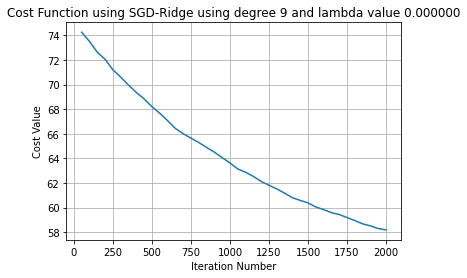

Iteration: Error Value:
50         177.2894113994489
100         175.30397705451938
150         173.47160509408286
200         171.64740035293667
250         169.73693919750764
300         168.18174123160995
350         167.02489107738288
400         166.10224320547374
450         164.53990857542988
500         163.48019163935368
550         162.3810820656942
600         161.31107263590204
650         160.16115004423662
700         159.31311610530454
750         158.15329067615264
800         157.2530731441239
850         156.35224576338436
900         155.3174247255065
950         154.35636132229382
1000         153.46731799528646
1050         152.60644059318807
1100         151.4579614579488
1150         150.45760548982818
1200         149.51998237962994
1250         148.76994038002385
1300         147.96396181945747
1350         147.4553414289345
1400         146.92594933985507
1450         146.2016708412907
1500         145.44667200299733
1550         144.82039868493092
1600       

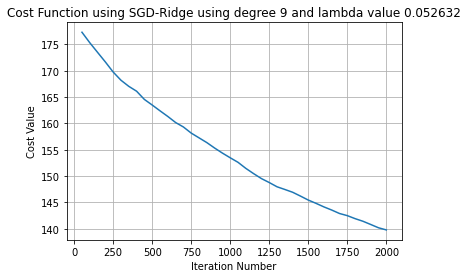

Iteration: Error Value:
50         171.60521840760836
100         169.78336399999645
150         167.4797570196066
200         166.0748537895637
250         164.6245224551893
300         163.09121919468046
350         161.73357582104742
400         160.4003582739249
450         158.9146576044808
500         157.71994456396905
550         156.21712819412411
600         154.78280279241784
650         153.65043508998204
700         152.67421471802888
750         151.32849849054568
800         150.44653555621048
850         149.66900764523282
900         148.8353336989208
950         148.04764380208846
1000         147.23446831872346
1050         146.4684469178054
1100         145.66064102589377
1150         144.9987389032668
1200         144.27837423760982
1250         143.6136891539099
1300         142.8479095182693
1350         142.23940754231174
1400         141.63195167091672
1450         141.0782526226661
1500         140.48288506630877
1550         140.04805715500652
1600         13

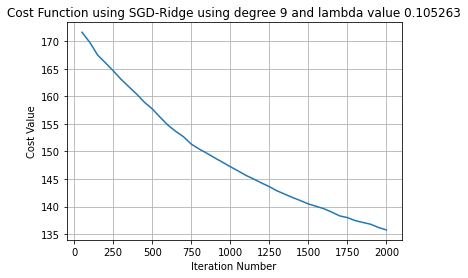

Iteration: Error Value:
50         171.80220865946842
100         169.8628850658337
150         168.31220209003763
200         166.409393606205
250         165.03403333639727
300         163.74092576521198
350         162.01747251109623
400         160.6053586627495
450         159.66262441356585
500         158.16624746930438
550         157.06139361367485
600         155.75450771196884
650         155.10115992382515
700         154.03595017553533
750         153.09420017757012
800         151.90194763191775
850         151.0230095361451
900         150.1688009051679
950         149.571782111431
1000         148.49557743102724
1050         148.00472668510827
1100         147.26774560846522
1150         146.3993890583463
1200         145.61598491180618
1250         144.63099484792886
1300         144.02554978746304
1350         143.22305289811013
1400         142.45923801159708
1450         141.90785108436333
1500         141.1727167022174
1550         140.34508889879675
1600         1

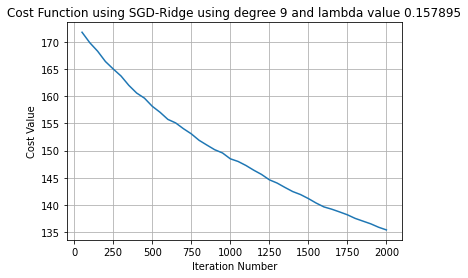

Iteration: Error Value:
50         171.48119491668228
100         169.74837080840192
150         168.1832305062669
200         166.54486837712443
250         165.2189190903267
300         163.47919335065478
350         161.69683096083168
400         160.5257341135798
450         159.37547194786987
500         158.05588183993976
550         156.71869494065604
600         155.48926938374657
650         154.31252006148594
700         153.18101275029204
750         152.3905754944224
800         151.4384066065539
850         150.33696046925562
900         149.591371444558
950         148.71467520587973
1000         147.87083733439744
1050         147.09034912858513
1100         146.3868109717919
1150         145.40876327518302
1200         144.6515657712034
1250         144.0795991388736
1300         143.56261867477892
1350         142.90626232262514
1400         142.38313812896033
1450         141.7259045472067
1500         141.28813380837877
1550         140.83256954171065
1600         14

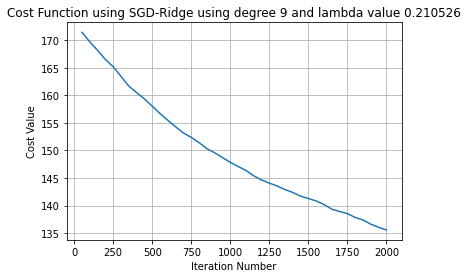

Iteration: Error Value:
50         171.31508488071722
100         169.79844393616924
150         168.28161386971038
200         166.6123701363747
250         165.40518266848807
300         163.3707450376431
350         161.84488097387967
400         160.61552461516362
450         159.8284628241527
500         158.86320895320495
550         157.82991366405656
600         156.9632162815108
650         155.91958774735662
700         155.32161668864515
750         154.42869059815365
800         153.34691240796425
850         152.89424025830695
900         152.1821925143494
950         151.0312362994838
1000         149.92610607831952
1050         149.40162647851253
1100         148.85352203573981
1150         147.84667224385112
1200         147.0403145348949
1250         146.29394773655676
1300         145.5805467413812
1350         144.9036227319215
1400         144.1020199704605
1450         143.63020112345328
1500         143.0200189053734
1550         142.4010947959157
1600         141

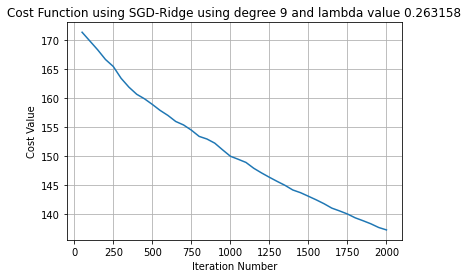

Iteration: Error Value:
50         172.6825445346776
100         171.09885183894465
150         169.68907280672624
200         168.14650878336656
250         166.70947100303675
300         165.1229086290652
350         163.83123199328088
400         162.4433247583663
450         161.12062775351882
500         159.96480791481653
550         158.8636244356389
600         157.94282926673864
650         156.66143469950123
700         155.7469902645014
750         154.33636328259792
800         153.35290985870054
850         152.3855008967632
900         151.54524455758653
950         150.83338041021997
1000         150.13618938756875
1050         149.16114947646955
1100         148.36421034794233
1150         147.5704607022607
1200         146.62910518498737
1250         145.70829885186885
1300         144.6749236641149
1350         143.76182262242378
1400         143.11813558330235
1450         142.47908755746704
1500         141.80833799213312
1550         141.20979795223528
1600        

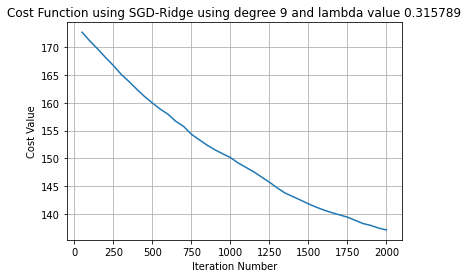

Iteration: Error Value:
50         172.15749302162416
100         169.99046710743877
150         168.61476389855554
200         167.18415043601968
250         165.63471843398747
300         164.3176104529686
350         162.92644186843052
400         161.71525794275618
450         160.1158628305125
500         158.84367262798094
550         157.66415278165056
600         156.81572085942807
650         155.81594125130925
700         155.1316967391145
750         153.98914219521646
800         152.55914090904997
850         151.56661322137552
900         150.54133688408393
950         149.77729151288924
1000         148.89994310162905
1050         148.13955366261044
1100         147.27781682906485
1150         146.71785002036086
1200         145.92705669332335
1250         145.14159698114563
1300         144.4715010758335
1350         143.59623787628922
1400         142.87324420828136
1450         142.2215211098208
1500         141.615182178328
1550         141.09567898039748
1600       

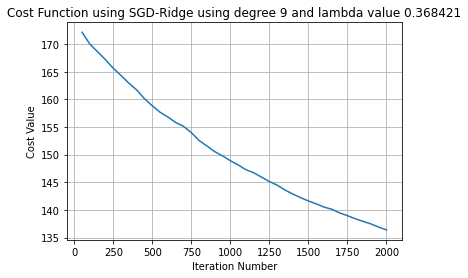

Iteration: Error Value:
50         171.24405995974638
100         169.30295700152055
150         168.1015433814944
200         166.71188462494138
250         165.25845465490363
300         164.34180163606226
350         163.07226639188218
400         162.00701899371708
450         160.3784463812505
500         159.1227842017539
550         158.06564365853995
600         156.7624676009232
650         155.88415134017526
700         155.19527660758365
750         154.60402139815426
800         153.43651658652598
850         152.43297283223575
900         151.57429660210627
950         150.87931472039548
1000         150.17000222798404
1050         149.33656359388567
1100         148.70107816475794
1150         148.28835053515664
1200         147.6064655311296
1250         147.03658134870312
1300         146.40280753904298
1350         145.38630922842304
1400         144.6517878079848
1450         144.05378817142392
1500         143.1170190311649
1550         142.75755324805746
1600       

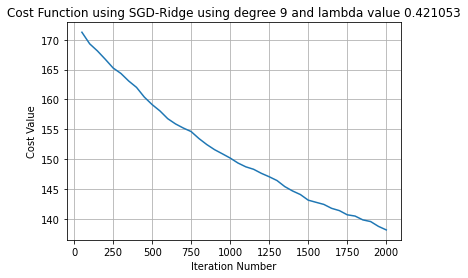

Iteration: Error Value:
50         173.0004828988045
100         171.12723018927807
150         169.6276130185026
200         167.70754768570623
250         166.21972800035098
300         164.4634060051692
350         162.69383613201066
400         161.39172931143708
450         160.31190174313946
500         159.08934646611903
550         158.26731473020624
600         157.33876489859463
650         156.1010023215736
700         154.82260519805473
750         153.69917378642197
800         152.6182063250668
850         151.75379706414745
900         150.78187996047672
950         150.0491336187988
1000         149.17024653839385
1050         148.6769764918556
1100         148.05171689835106
1150         147.37582619154054
1200         146.7834192854233
1250         146.16493868847695
1300         145.38070869369778
1350         144.80220267329378
1400         144.08993528413316
1450         143.39448001039648
1500         142.87331627458508
1550         142.2866031798699
1600         

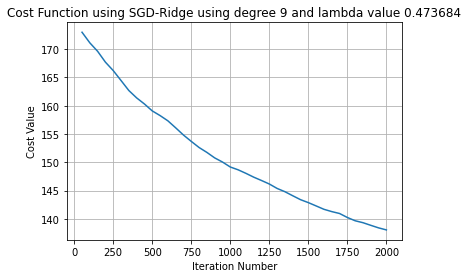

Iteration: Error Value:
50         172.76199594663925
100         170.99462837363248
150         169.07243824114565
200         167.09617869059218
250         165.80681013175257
300         164.4605971599451
350         163.1660007352464
400         161.90381929763697
450         160.46730863894564
500         159.17586923575698
550         158.38458176974592
600         157.4205466430872
650         156.4899939369125
700         155.38841207548708
750         154.29459893540886
800         153.2063627725114
850         152.44559067694425
900         151.45703968946734
950         150.65141057938376
1000         149.84297703508983
1050         148.84377161989403
1100         148.20794924788976
1150         147.46952333029708
1200         146.68635356116502
1250         146.1681045115002
1300         145.67451743945995
1350         145.13519251398114
1400         144.36160422103896
1450         143.67166034101982
1500         143.24775839593946
1550         142.7991179358416
1600       

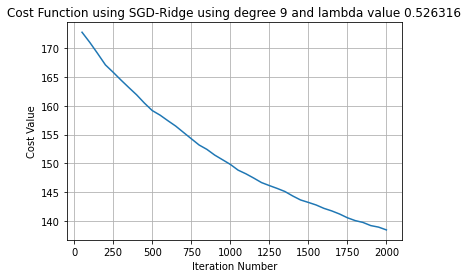

Iteration: Error Value:
50         172.8269192145662
100         170.9435515007098
150         169.44331022399683
200         167.79708912833613
250         166.1357647849769
300         164.7908617203166
350         163.60277284191417
400         162.40429708647264
450         161.23094588884257
500         160.03792441975216
550         158.80679707973937
600         158.1620074410244
650         156.97112755063048
700         156.09115128230923
750         154.99043588259119
800         154.0084876920321
850         153.26227074910696
900         152.13671739486784
950         151.43665527028102
1000         150.53799333429964
1050         149.9748333173899
1100         149.1709045584689
1150         148.4641107803865
1200         148.0684232026402
1250         147.2212256645757
1300         146.75021426495704
1350         146.197899166435
1400         145.8770435805822
1450         145.37959044483028
1500         144.83798921667795
1550         144.12053676883323
1600         143.3

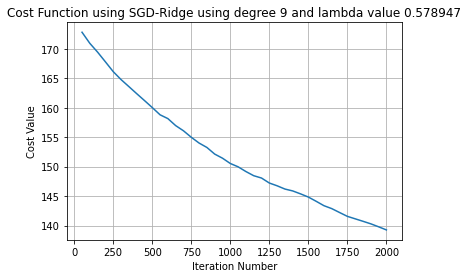

Iteration: Error Value:
50         173.1955858845458
100         171.80217285098507
150         169.91192622725353
200         168.18422460331323
250         166.55878191707282
300         164.88474099418346
350         163.52634752225723
400         161.8142786781651
450         160.3431569880624
500         159.339861879425
550         158.13236427445239
600         156.99942843869624
650         156.04301398197106
700         154.79596740955517
750         153.93014657931334
800         153.017320581079
850         151.69644231693093
900         150.59938651396791
950         149.8303435902635
1000         149.15811513558256
1050         148.550752561986
1100         147.77709870734554
1150         146.8007561311082
1200         146.07528649985832
1250         145.71899705302562
1300         145.0143874109216
1350         144.269028829174
1400         143.68617465655336
1450         143.23518881323778
1500         142.52895503115923
1550         141.95249865817343
1600         141.5

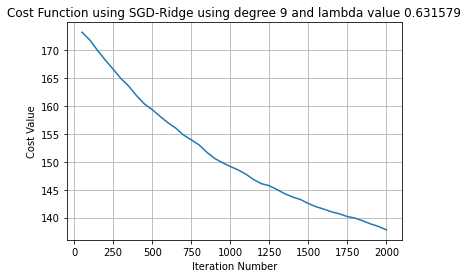

Iteration: Error Value:
50         171.6342177448092
100         170.4056310920862
150         168.92931345695257
200         166.8961167153561
250         165.30028981037145
300         163.4763166899869
350         162.03781070150035
400         161.01561350577015
450         159.52489181269215
500         158.3324945474783
550         157.27242575432476
600         156.11798175964637
650         154.91514491007914
700         153.87899539639096
750         152.86063655564988
800         151.996511819495
850         151.48551286746894
900         150.95656860982666
950         150.12502149015435
1000         149.13240613307855
1050         148.41231805692934
1100         147.65037493524395
1150         146.66372144826755
1200         146.1483379898289
1250         145.51238406832275
1300         144.8615270573063
1350         144.1228485059683
1400         143.6935210305648
1450         143.260857538898
1500         142.55051918885897
1550         142.22767997043556
1600         141.

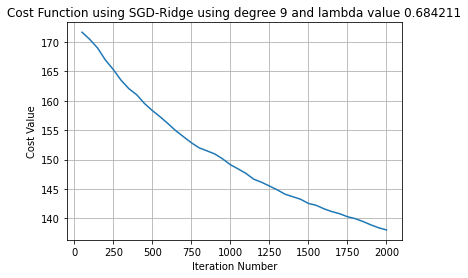

Iteration: Error Value:
50         173.00328034587585
100         170.88426764088308
150         169.1147460669708
200         167.79915232775258
250         166.34930347713527
300         164.82881709458437
350         163.58991517725428
400         162.35041390974527
450         160.52468671231915
500         159.17806613769554
550         158.12040793582236
600         157.14970231291053
650         155.90559024546602
700         155.06822744282033
750         154.14483019810325
800         153.1774553801174
850         152.28004210382284
900         151.37621956737735
950         150.52792729881995
1000         149.90100964476014
1050         149.11725451211663
1100         148.35122315006663
1150         147.75428712097266
1200         146.93545070836802
1250         146.27095115683738
1300         145.82208604027318
1350         145.24577696009695
1400         144.59694285044083
1450         144.18217452355563
1500         143.4443288235234
1550         142.8993359116474
1600    

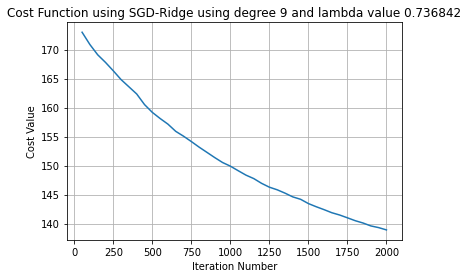

Iteration: Error Value:
50         172.89837015430197
100         171.32278393039667
150         170.13261994961843
200         168.54434729482887
250         167.12913721887085
300         165.91927686704696
350         164.4933992653709
400         162.98196316928
450         162.1970016429628
500         161.13627506131786
550         159.97059766589672
600         159.2177555811636
650         158.15331441755072
700         157.2625850476203
750         156.41601583624885
800         155.41561361583183
850         154.62636859386296
900         153.82439963218135
950         152.8633934222079
1000         151.88684887227407
1050         150.9938933423371
1100         150.33107678342657
1150         149.72973090257662
1200         148.68660489270079
1250         148.2770254026557
1300         147.47518343714543
1350         146.85237061501385
1400         146.03700918987505
1450         145.21846314372567
1500         144.75558835677015
1550         143.94768066829639
1600         1

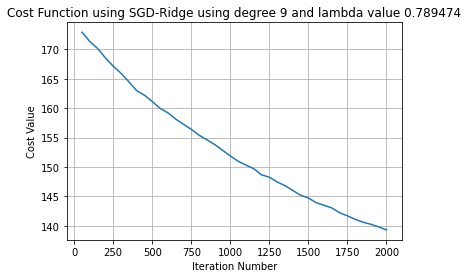

Iteration: Error Value:
50         172.7836780089839
100         170.9639640506802
150         169.01566092625183
200         167.65273354295545
250         165.97562382410132
300         164.96525331330062
350         163.75058983955714
400         162.39472356772694
450         161.16491784471123
500         160.00899515233968
550         159.16169044392066
600         157.94541365980652
650         156.6001143612306
700         155.66077484514818
750         154.62669956471393
800         153.96118934835542
850         153.28809625251358
900         152.67643435829817
950         151.67603466617388
1000         150.90552788845864
1050         150.09951478934295
1100         149.6564621939861
1150         148.73152347284085
1200         148.20791723497018
1250         147.54508013505378
1300         147.21691207410922
1350         146.5228001324212
1400         145.80063628848905
1450         145.39272530273524
1500         144.74838401393077
1550         143.99217396135654
1600     

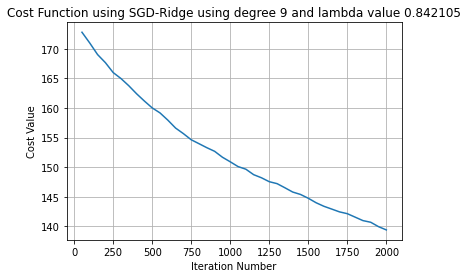

Iteration: Error Value:
50         172.79390848442657
100         170.91708397252935
150         169.61023723231983
200         167.88697879263023
250         166.136186254575
300         164.1222923294414
350         162.73390319491403
400         161.02401820402434
450         160.01915604254765
500         158.93480041065442
550         157.80398263578212
600         156.38615771338806
650         155.21177929023716
700         154.39454267015049
750         153.29434898550895
800         152.47240175763068
850         151.73786757399975
900         151.00756855314313
950         150.22795268855347
1000         149.60182274906094
1050         149.00870523910655
1100         148.60065267452927
1150         148.101532220745
1200         147.3703532002739
1250         146.71197688748396
1300         146.50859193360813
1350         146.1223743761883
1400         145.32014230616113
1450         144.7567480729398
1500         144.13820099591914
1550         143.5947275811268
1600         

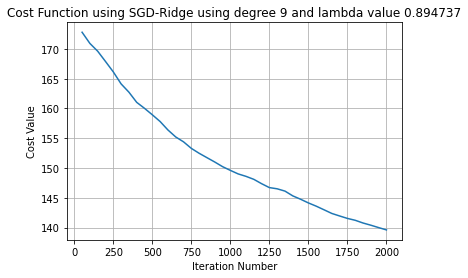

Iteration: Error Value:
50         173.12631376147556
100         171.40258502755063
150         169.90919804510938
200         168.1911446924625
250         166.70329596376922
300         165.18099137702805
350         163.77910652810013
400         162.75428440099807
450         161.77251533469
500         160.59354221150784
550         159.62249138765998
600         158.33832166654915
650         157.248078324034
700         156.7744625080838
750         155.85659178527862
800         154.63539161779659
850         153.65368067381695
900         152.85429527773053
950         151.84740696574414
1000         150.69903121878008
1050         149.99628751281784
1100         148.97849178015088
1150         148.26446444179533
1200         147.6017770683473
1250         147.35780146631862
1300         146.6158757237646
1350         146.0880131987528
1400         145.4622663164852
1450         144.9365421373343
1500         144.54292699267646
1550         144.1020239626735
1600         143.

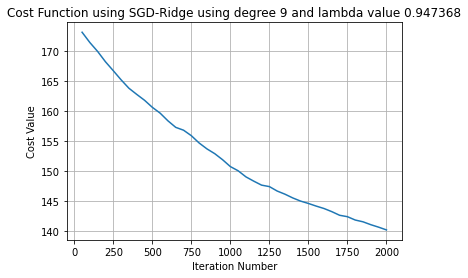

Iteration: Error Value:
50         172.60976513699106
100         171.3914574153746
150         169.7205055088918
200         167.69071948088285
250         166.3589260596026
300         164.62021974744246
350         163.12872582904166
400         161.69262843365672
450         160.46359062142486
500         159.52509318569028
550         158.18059939097674
600         157.44609749115057
650         155.8015567278781
700         154.68271412231107
750         153.90006707237217
800         152.93952456372787
850         152.07447908803653
900         151.58691833350215
950         150.9985537742839
1000         150.32178423538974
1050         149.388596092977
1100         148.80086894570454
1150         148.03721094299888
1200         147.24072525370818
1250         146.68582043080403
1300         145.94526259101258
1350         145.26558140151639
1400         144.82110154240607
1450         144.2749022781669
1500         143.96201387007125
1550         143.51165662130708
1600        

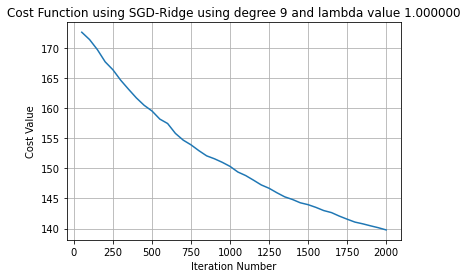

Lambda Values:  [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
RMSE for Training Data:  [0.3174337058875527, 0.49193547282901134, 0.48476752196636064, 0.48406683916836923, 0.48434114595312816, 0.487228489944794, 0.48700465775971086, 0.48565397123555953, 0.4887403641829972, 0.4885395356539053, 0.48927177545938205, 0.49061964755348275, 0.487994387991329, 0.4884199572824794, 0.4898736861861594, 0.4906142459756751, 0.49072623745651134, 0.49104159216259, 0.49193155436336056, 0.49125014646928683]
RMSE for Testing Data:  [0.5568387498295994, 0.547503313422831, 0.5485369767760174, 0.5473413248398584, 0.5481989468393509, 0.5494517352260029, 0.5485972572129061, 0.5481773302463153, 0.5504225155631752, 0.5489161350957279, 0.550273437558138, 0.550267415984577, 0.5485372546022472, 0.5498498579514446, 0.550010005645055, 0.550

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


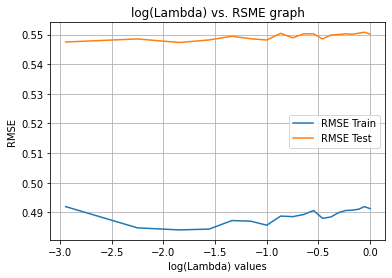

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


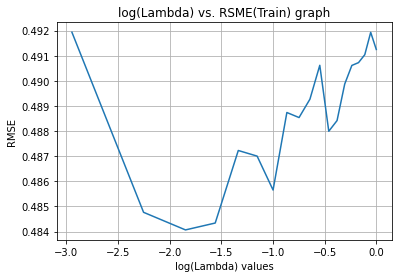

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


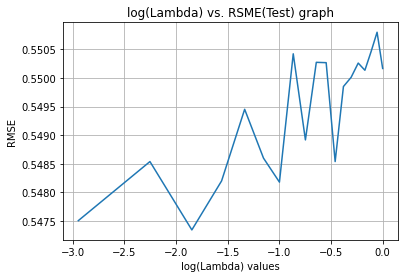

In [ ]:
import matplotlib.pyplot as plt
arrRMS_train = []
arrRMS_test = [] 
eta = 0.1 #Learning rate
arr = np.linspace(0,1,20)
print(arr)
deg = 9
for i in arr: 
  [x,y] = Stochastic_GD_ridge(deg, eta, i)
  arrRMS_train.append(x)
  arrRMS_test.append(y)

print("Lambda Values: ", arr)
print("RMSE for Training Data: ", arrRMS_train)
print("RMSE for Testing Data: ", arrRMS_test)
print("Minimum RMSE Train: ", min(arrRMS_train))
print("Minimum RMSE Test: ", min(arrRMS_test))
print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_train)
plt.plot(np.log(arr), arrRMS_test)
plt.title("log(Lambda) vs. RSME graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.legend(["RMSE Train", "RMSE Test"])
plt.show()


print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_train)
plt.title("log(Lambda) vs. RSME(Train) graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.show()



print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_test)
plt.title("log(Lambda) vs. RSME(Test) graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.show()

# **Lasso Regression - Polynomial of Degree 9**

In [ ]:
def cost_function_lasso(theta, X, Y, lam):
  m = X.shape[0]
  X = X.T
  pred = X.dot(theta)
  cost = (1/(2*m))*np.sum(np.square(Y-pred)) + lam*(np.sum(np.abs(theta)))
  return cost
  

## Gradient Descent Algorithm - Lasso Regression

In [ ]:
def gradientDescent_lasso(deg, eta, lam):
  X = np.array(featureVector(trdata, deg))
  Xtest = np.array(featureVector(tsdata, deg))
  #X.shape = 3*1155
  W = np.zeros((int((deg+1)*(deg+2)/2),1))
  count = 0
  n_iter = 2000
  pE = 100000 #Error from previous iteration. 
  E = 10000 #Error from current iteration. 
  minE = E
  x_axis = [] #for the graph
  y_axis = []
  #Iterate till convergence. 
  print("Iteration: Error Value:")
  while count < n_iter:
    count = count+1 #Counts number of iterations. 
    pE = E 
    Yp = np.dot(X.T, W) #Predicted value
    W = W - ((eta/m)*((np.dot(X, (Yp-y))+lam)))
    E = cost_function_lasso(W, X, y, lam) #Current iteration's error
    if E < minE:
      minE = E
    if count%50==0:
      x_axis.append(count)
      y_axis.append(E)
      print(count,"       ", E)
  Etest = cost_function_lasso(W, Xtest, ytest, lam)
  print("Degree of polynomial: ", deg, "Training Error: ", E, "Testing Error: ", Etest)
  print("The minimum training error value is ", minE)
  Y_pred_train = (X.T).dot(W)
  Y_pred_test = (Xtest.T).dot(W)
  rmse_train = math.sqrt(np.mean(np.square(Y_pred_train - y)))   #calcuate and print train and test errors
  rmse_train = rmse_train*(y_max - y_min) + y_min
  rmse_test = math.sqrt(np.mean(np.square(Y_pred_test - ytest)))
  rmse_test = rmse_test*(ytest_max - ytest_min) + ytest_min
  print("Final training set RMSE : " + str(rmse_train))
  print("Final test set RMSE : " + str(rmse_test))
  plt.figure()
  plt.grid()
  plt.plot(x_axis, y_axis)
  plt.title("Cost Function for GD-Lasso degree 9 using %f" %lam)
  plt.ylabel("Cost Value")
  plt.xlabel("Iteration Number")
  plt.show()
  return[rmse_train, rmse_test]

[0.         0.00526316 0.01052632 0.01578947 0.02105263 0.02631579
 0.03157895 0.03684211 0.04210526 0.04736842 0.05263158 0.05789474
 0.06315789 0.06842105 0.07368421 0.07894737 0.08421053 0.08947368
 0.09473684 0.1       ]
Iteration: Error Value:
50         0.027614311965327723
100         0.012085736467861758
150         0.0057553521356533775
200         0.002980200352834359
250         0.0017433676828009549
300         0.00117405466275044
350         0.0008959785702658738
400         0.0007463957214243333
450         0.0006547880821488973
500         0.0005904821935222944
550         0.0005400301028383881
600         0.0004974407924875018
650         0.0004599603707744245
700         0.0004262483170667659
750         0.0003955884842131466
800         0.00036754705155115275
850         0.0003418236038980297
900         0.00031818572307730036
950         0.000296439749145751
1000         0.00027641725783431547
1050         0.00025796841255320847
1100         0.0002409583642769357
115

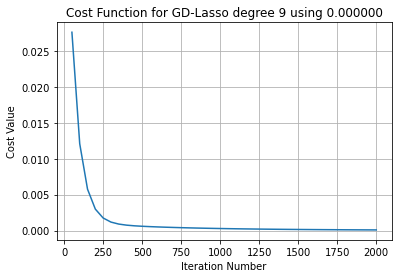

Iteration: Error Value:
50         0.014655867616807027
100         0.008011714255772002
150         0.005166286778949876
200         0.0040725954312720615
250         0.0036620441761687026
300         0.003486776159160583
350         0.003402528296227889
400         0.0033477799783973054
450         0.003302471764222386
500         0.0032588155940979392
550         0.0032171680431935562
600         0.003178704975178147
650         0.0031404524719392834
700         0.003102743787946599
750         0.0030653245894049132
800         0.0030285879971574036
850         0.002992779951880909
900         0.0029588599075483922
950         0.0029261568233369924
1000         0.0028950701344486887
1050         0.00286511246107249
1100         0.0028362235744372665
1150         0.0028096602318172055
1200         0.002784769745838165
1250         0.0027607603188498316
1300         0.0027375946734879814
1350         0.0027153506780739837
1400         0.0026948825682151503
1450         0.0026751079983

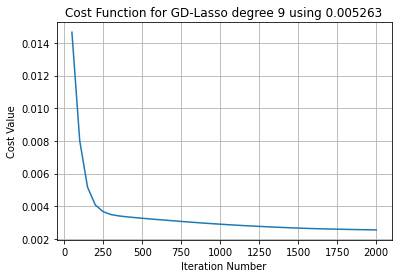

Iteration: Error Value:
50         0.019993459634007137
100         0.012121052306759954
150         0.00862332859517058
200         0.00741073203099636
250         0.0070313600318516935
300         0.006885486027232937
350         0.006817062661903809
400         0.006759432466821666
450         0.006699372803633462
500         0.006632340327648509
550         0.006563539277920575
600         0.006498539629976431
650         0.006432018599496148
700         0.006365443889880503
750         0.006298284908580426
800         0.006231541300525692
850         0.006165849783218539
900         0.006103561185403947
950         0.006042891113654869
1000         0.005983918561480608
1050         0.005927292968834412
1100         0.0058727778247976955
1150         0.0058225468354613525
1200         0.0057754805041408735
1250         0.005729843332715538
1300         0.005685592713226784
1350         0.0056435643319967576
1400         0.005604328103030637
1450         0.005566251166142856
1500   

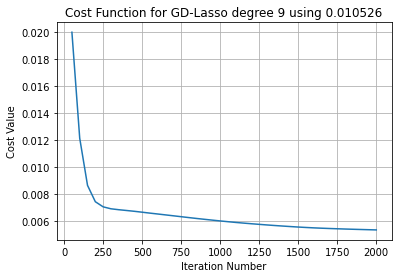

Iteration: Error Value:
50         0.023273990387253106
100         0.015156233031858379
150         0.011422195553432175
200         0.010253137121232258
250         0.009966500802636788
300         0.00987715667769696
350         0.009837704165110947
400         0.009783910026060086
450         0.009714758963515542
500         0.009629763612773602
550         0.009538189066857584
600         0.009451290962813932
650         0.009360056174861964
700         0.009268891461357658
750         0.009176200879299296
800         0.009083553258113596
850         0.008992229071750945
900         0.0089053033098065
950         0.008820285931267524
1000         0.008737397651380763
1050         0.008656750028975318
1100         0.008578384374761511
1150         0.008506950070540297
1200         0.008440346741827994
1250         0.008375614663768592
1300         0.008312711162272047
1350         0.008253934863174571
1400         0.008198070552776451
1450         0.008143749496725102
1500         

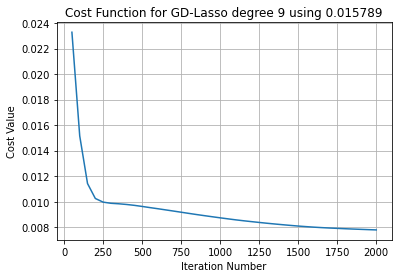

Iteration: Error Value:
50         0.027360699601944573
100         0.01864672090721985
150         0.01452491545231841
200         0.013339682743255307
250         0.013122193101242657
300         0.01307972290579921
350         0.013064314745567254
400         0.013010053918114134
450         0.012928611716545423
500         0.012822785151845277
550         0.012705095159212244
600         0.012593636427436227
650         0.012475245426306406
700         0.012356073752865356
750         0.012235253482337232
800         0.012114146699510199
850         0.01199494581394851
900         0.011880996189877029
950         0.01176936054606548
1000         0.011660357715706286
1050         0.011554157580358047
1100         0.011450833748673834
1150         0.01135508886882612
1200         0.011265663372298904
1250         0.011179603351825234
1300         0.01109634905107143
1350         0.01101984268590485
1400         0.010945845566898512
1450         0.01087382259832493
1500         0.0108

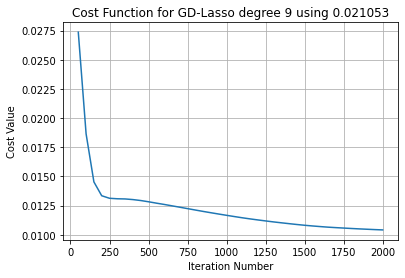

Iteration: Error Value:
50         0.0311525364726698
100         0.02196429087612129
150         0.017508571260968695
200         0.016323246787225017
250         0.01617792969423489
300         0.01618365178616189
350         0.016192658905693248
400         0.016139815927364142
450         0.01604363780795924
500         0.015917530497920683
550         0.015773713769782916
600         0.01563817844908932
650         0.015494200679307958
700         0.015345851959231705
750         0.015197447267620949
800         0.015048430463003368
850         0.01490212442104161
900         0.01476168582210955
950         0.014623953456441782
1000         0.014489342266139063
1050         0.01435807945386673
1100         0.014230270568968246
1150         0.014111507797259733
1200         0.014000799209103722
1250         0.01389307737375831
1300         0.013789346284216315
1350         0.013693648002200758
1400         0.013601347604364343
1450         0.01351187951111354
1500         0.0134292

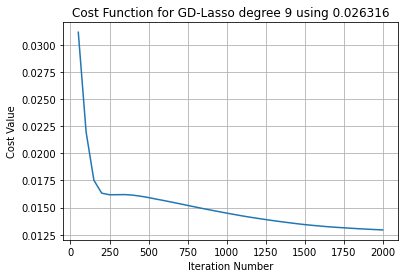

Iteration: Error Value:
50         0.03505781572392536
100         0.0253543543879856
150         0.020546441706541383
200         0.01935196327946607
250         0.0192751908294162
300         0.019328519978402733
350         0.01935838529871128
400         0.019306642649343196
450         0.019193138788174153
500         0.019045960704530077
550         0.01887465867914421
600         0.018714240966533794
650         0.018544148272382707
700         0.018366669879140853
750         0.018188165449083422
800         0.01801046772088232
850         0.017836519805154133
900         0.017668896238845266
950         0.017504389442327947
1000         0.01734351087009245
1050         0.01718654505024888
1100         0.017033629226513608
1150         0.016891147923846935
1200         0.016758592608116567
1250         0.01662955236372478
1300         0.016507206191216418
1350         0.01639253428003692
1400         0.016280884437902206
1450         0.016172180125020797
1500         0.01607324

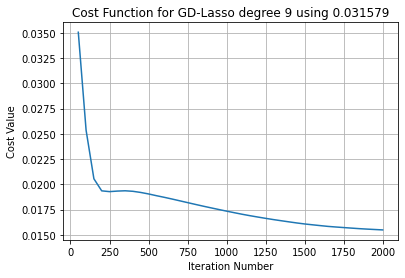

Iteration: Error Value:
50         0.0389253533290393
100         0.02872236104414448
150         0.023570012436692888
200         0.022365237118938418
250         0.022359059203398677
300         0.02245529126753975
350         0.02250450939684703
400         0.0224536106530711
450         0.022326301309484688
500         0.022152410819338577
550         0.021952796982299783
600         0.021767205106007166
650         0.021571016834303975
700         0.021365097247615226
750         0.02115452631635072
800         0.020947771905600716
850         0.02074618103732905
900         0.020551180928574362
950         0.02035971449748743
1000         0.02017238895043038
1050         0.019989545594938797
1100         0.019811352965481883
1150         0.019644866914807328
1200         0.01949029126199495
1250         0.019339763412612912
1300         0.019199301987877327
1350         0.019065507218093757
1400         0.01893519896270609
1450         0.018808292108398555
1500         0.01869714

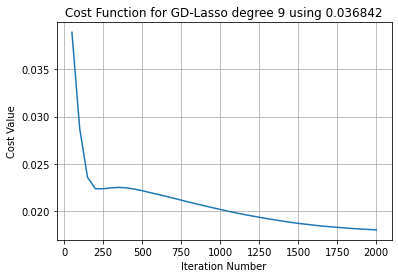

Iteration: Error Value:
50         0.04281050631126182
100         0.03210406198004184
150         0.02660610976579212
200         0.02538701984905175
250         0.025450102570013674
300         0.02558698831270647
350         0.02565397149984596
400         0.025603527299592487
450         0.02546316938747637
500         0.025262089401012423
550         0.02503039486557935
600         0.024819202101895102
650         0.0245966590345034
700         0.024361861282198798
750         0.02412160435334542
800         0.023881572414458523
850         0.023652125656618
900         0.023429357792955702
950         0.023210551309835733
1000         0.0229964089142984
1050         0.022787328403416164
1100         0.022583509292071792
1150         0.022392567444105206
1200         0.02221564265405017
1250         0.022043307314100053
1300         0.021885074219084658
1350         0.02173187366722448
1400         0.021582631587784562
1450         0.02143725402859395
1500         0.02131487645120

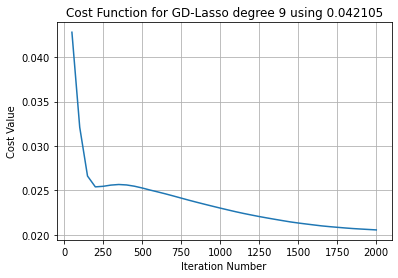

Iteration: Error Value:
50         0.046693129467025245
100         0.03548610032287632
150         0.02964421701548091
200         0.028408054558774702
250         0.02853905325026879
300         0.02871461129011389
350         0.028797787469077036
400         0.02874745180892278
450         0.028593948098207773
500         0.028367221495172963
550         0.028102209183367383
600         0.027862587815262997
650         0.027612492960688417
700         0.027348462979172802
750         0.027078177377855776
800         0.026806626164984335
850         0.026546093658546568
900         0.02629524405683756
950         0.026048792704738904
1000         0.025807537347955895
1050         0.025571931873264862
1100         0.025342206420742402
1150         0.025126421721708137
1200         0.024926879263806444
1250         0.024734243020587902
1300         0.0245568747413426
1350         0.02438403746786234
1400         0.02421563668368436
1450         0.02405494484372148
1500         0.023919

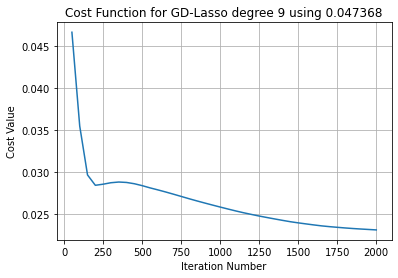

Iteration: Error Value:
50         0.0505805083516967
100         0.038873414084627314
150         0.03268816424403612
200         0.03143529741755458
250         0.031629366588837624
300         0.0318416077701642
350         0.03193940363314153
400         0.03188881638567871
450         0.031722046139277635
500         0.031468784980463314
550         0.031172297401447478
600         0.03090637995823012
650         0.030624662430578306
700         0.030328169844893862
750         0.030027480949689937
800         0.02972531273287858
850         0.029433877633207414
900         0.02915198724234847
950         0.028877557449186075
1000         0.02860886494234082
1050         0.02834641934341153
1100         0.028090481082071163
1150         0.027849442090216347
1200         0.027626990460760115
1250         0.02741539585237992
1300         0.027217647370073705
1350         0.027026077279117114
1400         0.026840155216306824
1450         0.026671099565094718
1500         0.026528306

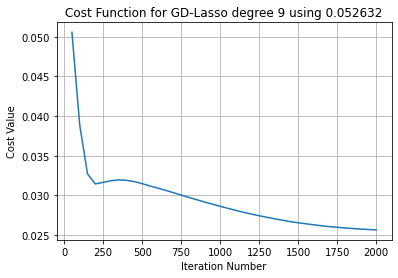

Iteration: Error Value:
50         0.054470021747435676
100         0.04226419326183939
150         0.03573652933966867
200         0.0344656925608325
250         0.03471974223792438
300         0.034969599248797154
350         0.03508128453091736
400         0.03502632442852233
450         0.03484617535413286
500         0.03456550146814431
550         0.03423665554619945
600         0.03394544725897732
650         0.033635496046726686
700         0.03330915270059214
750         0.03297570994877821
800         0.03264119075285436
850         0.03232017226915919
900         0.032005964225892206
950         0.03170046741807286
1000         0.03140441345307419
1050         0.031115550344080596
1100         0.030834139199112928
1150         0.03056876313970256
1200         0.03032469898000685
1250         0.030096329172350316
1300         0.02988552923793238
1350         0.029680808993716827
1400         0.029482194051743852
1450         0.029303182744572727
1500         0.029147691372243

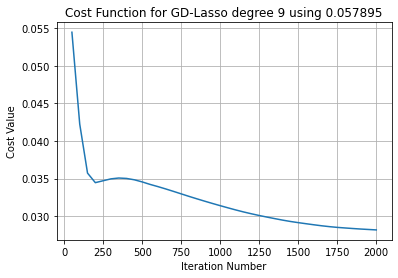

Iteration: Error Value:
50         0.058362608859183526
100         0.045659096915660474
150         0.03878983575985164
200         0.03750020008004506
250         0.03781066413832084
300         0.03810050952389444
350         0.03822238999096102
400         0.038160459978634535
450         0.03796681676209685
500         0.03766027799338514
550         0.037295756972165736
600         0.0369791611000302
650         0.03664067148213892
700         0.0362842129245856
750         0.03591994653656751
800         0.03555445627895413
850         0.035204979144262974
900         0.03486174612065842
950         0.034525208391456716
1000         0.03419781236254746
1050         0.03388199972160992
1100         0.03357466075367831
1150         0.03328988012749001
1200         0.03302926400249941
1250         0.032789829951756284
1300         0.03255999358005242
1350         0.03233658503800482
1400         0.03212540909401179
1450         0.03193021676132541
1500         0.03176224284310507
1

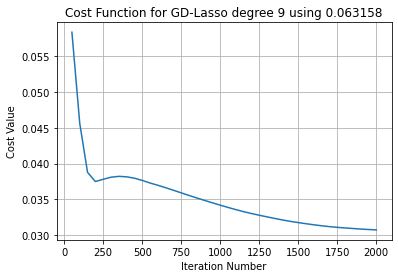

Iteration: Error Value:
50         0.06225793484071611
100         0.049057886827900306
150         0.04184789258777709
200         0.040537556633182606
250         0.04090213056269817
300         0.04123096873629236
350         0.041361244902450134
400         0.041291044456440565
450         0.04108379285972074
500         0.04075200455444128
550         0.04035162612950136
600         0.04000734828873505
650         0.039640017092429064
700         0.039253150217159076
750         0.03885777641881266
800         0.03846104007358861
850         0.03808305849709802
900         0.03771057064470952
950         0.03734531609443314
1000         0.03699454035997205
1050         0.036653154625581906
1100         0.03632526747683624
1150         0.03601585552028248
1200         0.035733937263550966
1250         0.0354776890762014
1300         0.03522854715688913
1350         0.03498636342097648
1400         0.034763473908510645
1450         0.03455205260092755
1500         0.0343776337905285

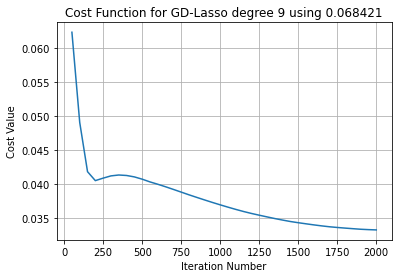

Iteration: Error Value:
50         0.06615611902702731
100         0.05246064897931348
150         0.044910769294555085
200         0.043577827648864365
250         0.044000429417028
300         0.04436104237426129
350         0.04450533378691262
400         0.04442263899632049
450         0.04419716890987222
500         0.04383982289379158
550         0.04340410673965848
600         0.04303007252326421
650         0.042633596011066574
700         0.042216027118245986
750         0.041789261529842955
800         0.04136225420095839
850         0.04095949892003821
900         0.04056408738579795
950         0.04017694060576861
1000         0.03979916942259993
1050         0.03943137253190984
1100         0.039073816645121356
1150         0.03873650780861406
1200         0.03843597489133679
1250         0.03815978502836879
1300         0.03789124599135761
1350         0.03763133417023326
1400         0.03740626841020114
1450         0.03718784282563888
1500         0.03700495206828352
15

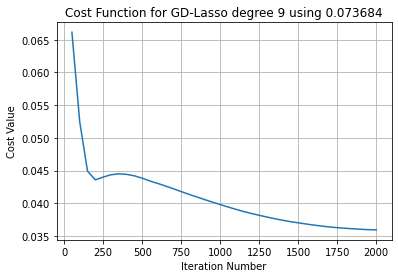

Iteration: Error Value:
50         0.07005711938642611
100         0.055867352796257236
150         0.047978441028354586
200         0.04662098963081603
250         0.04710007565050054
300         0.047490706852977294
350         0.04765156204718844
400         0.04756049035175061
450         0.04730692138978301
500         0.04692370967758842
550         0.04645176967121767
600         0.04604731083955765
650         0.045621385476347205
700         0.04517720277539334
750         0.04472450163348665
800         0.044273778959208344
850         0.04384310927237448
900         0.04341924319907178
950         0.04300421668226738
1000         0.04259922307680271
1050         0.04220490663307068
1100         0.04182155559139031
1150         0.041459455018503205
1200         0.04113653723645032
1250         0.04083930822444636
1300         0.04056082027546947
1350         0.0402982058633913
1400         0.040057555505348334
1450         0.03982401314982186
1500         0.03963049916826987


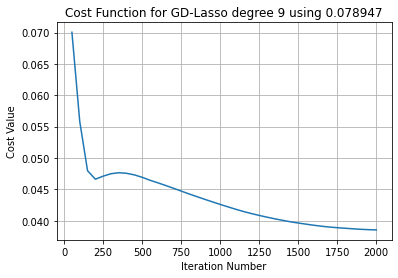

Iteration: Error Value:
50         0.07396095104841456
100         0.059278009426706066
150         0.05105091692346538
200         0.04966705125903656
250         0.05020107795191339
300         0.0506199709175997
350         0.05079822540589865
400         0.05070306995539767
450         0.05042680519940764
500         0.050011184929891254
550         0.04950609985301963
600         0.049070262204220894
650         0.04861924169512313
700         0.04814535606087227
750         0.047661965789979166
800         0.047182199838691805
850         0.046722509357634605
900         0.04627006408672638
950         0.045827038828338475
1000         0.0453947091840734
1050         0.04497376471945948
1100         0.04456451498354605
1150         0.04418163295351708
1200         0.043851545346776565
1250         0.04354238336047083
1300         0.0432425565348196
1350         0.04296765256837446
1400         0.042713450013280765
1450         0.04246893758033079
1500         0.04227032986547796


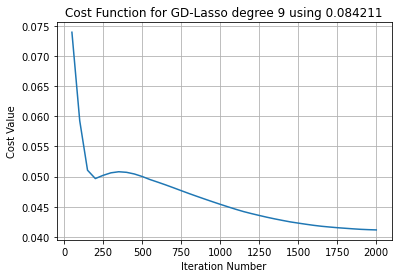

Iteration: Error Value:
50         0.07786760894832657
100         0.0626926151408167
150         0.054128193924773124
200         0.05271600963095599
250         0.05330343341605294
300         0.05374883164420935
350         0.05394432640732513
400         0.053844801254496595
450         0.05355269899663179
500         0.0531036816064917
550         0.05256512836412694
600         0.05209351701727266
650         0.05161370945562866
700         0.05110957470210467
750         0.05059532213304363
800         0.05008653833446554
850         0.04959769647243145
900         0.049116547370988514
950         0.04864540439126738
1000         0.048185625116131774
1050         0.0477408631187027
1100         0.04731714265821709
1150         0.046918124724374725
1200         0.04657594598053919
1250         0.04625257330639731
1300         0.04593941088765236
1350         0.04565964199095691
1400         0.04539060177677458
1450         0.04513020174389873
1500         0.04492261408023493
1550

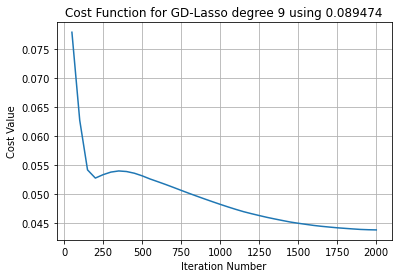

Iteration: Error Value:
50         0.08177709513858178
100         0.06611117149627656
150         0.05721027333138197
200         0.05576786599474213
250         0.05640714329916396
300         0.05688137992082542
350         0.05708986632171459
400         0.056985685516620546
450         0.056677625093380674
500         0.05620277871164878
550         0.05562604410334495
600         0.05511320749531718
650         0.05460442433379702
700         0.05406985991036121
750         0.05352457186224995
800         0.05298679563387902
850         0.05246867179290699
900         0.05195869421697066
950         0.0514609241595616
1000         0.05098910275002855
1050         0.05053102666319391
1100         0.05008694372825295
1150         0.04967122919731349
1200         0.04931261882929004
1250         0.048971048925744144
1300         0.048646095298230635
1350         0.04835294573296034
1400         0.0480691580105845
1450         0.04780901556399689
1500         0.04760133979835034
1550

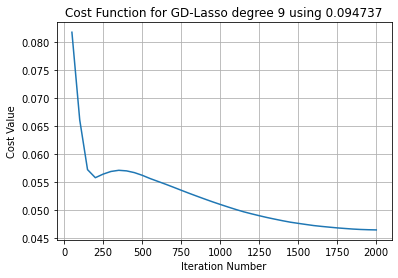

Iteration: Error Value:
50         0.08568940916876719
100         0.06953367817722239
150         0.06029715489252491
200         0.058822620116925274
250         0.05951220736994401
300         0.06001967652673838
350         0.06023484491772479
400         0.06012572251134667
450         0.05980158326080018
500         0.059300792555403464
550         0.05869216513801917
600         0.05814297118995304
650         0.057599941975822855
700         0.0570336253359706
750         0.05645728599244007
800         0.055891758504505964
850         0.05534632251534782
900         0.05481999929045439
950         0.05430888807536197
1000         0.05381157889352135
1050         0.05332876531871148
1100         0.052860710927468954
1150         0.05242847372888811
1200         0.052049539911443725
1250         0.051689826906607325
1300         0.05135587917619063
1350         0.05105489051004364
1400         0.05077122940960561
1450         0.05050194026679334
1500         0.05028449443740364


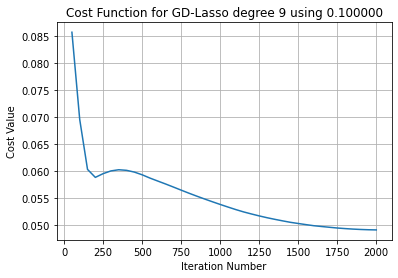

Lambda Values:  [0.         0.00526316 0.01052632 0.01578947 0.02105263 0.02631579
 0.03157895 0.03684211 0.04210526 0.04736842 0.05263158 0.05789474
 0.06315789 0.06842105 0.07368421 0.07894737 0.08421053 0.08947368
 0.09473684 0.1       ]
RMSE for Training Data:  [0.002799435024910825, 0.0017561187020122102, 0.0018470125995637145, 0.0018109097381144438, 0.0018203668312506537, 0.0018168180397336027, 0.0018197530932605396, 0.0018226403100027866, 0.0018276501753859771, 0.0018340426735304416, 0.0018420439800399398, 0.001851553226546853, 0.0018625739097943086, 0.001875070547192969, 0.001889016777815639, 0.001904379782142102, 0.0019211258931283158, 0.001939219172574527, 0.0019586223214000612, 0.0019792968057931065]
RMSE for Testing Data:  [0.3463362908110169, 0.3651226542024556, 0.3586114034558687, 0.3607667129360933, 0.3600376703005898, 0.36027902553332347, 0.36019503060519725, 0.360220263640088, 0.3602088496844332, 0.36020974456337196, 0.36020651626028055, 0.36020468032805036, 0.36020238

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


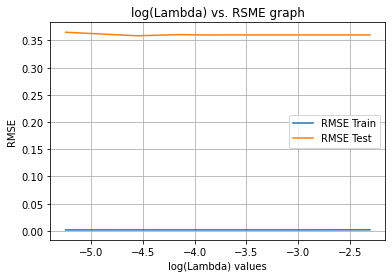

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


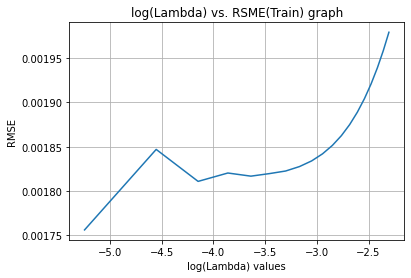

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log


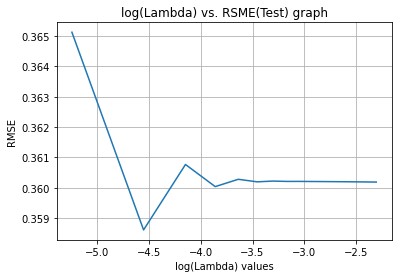

In [ ]:
import matplotlib.pyplot as plt
arrRMS_train = []
arrRMS_test = [] 
eta = 0.1 #Learning rate
arr = np.linspace(0,0.1,20)
print(arr)
deg = 9
for i in arr: 
  [x,y] = gradientDescent_lasso(deg, eta, i)
  arrRMS_train.append(x)
  arrRMS_test.append(y)

print("Lambda Values: ", arr)
print("RMSE for Training Data: ", arrRMS_train)
print("RMSE for Testing Data: ", arrRMS_test)
print("Minimum RMSE Train: ", min(arrRMS_train))
print("Minimum RMSE Test: ", min(arrRMS_test))

print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_train)
plt.plot(np.log(arr), arrRMS_test)
plt.title("log(Lambda) vs. RSME graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.legend(["RMSE Train", "RMSE Test"])
plt.show()


print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_train)
plt.title("log(Lambda) vs. RSME(Train) graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.show()



print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_test)
plt.title("log(Lambda) vs. RSME(Test) graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.show()

## Stochastic Gradient Descent Algorithm - Lasso Regression

In [ ]:
def Stochastic_GD_lasso(deg ,eta, lam):
    X = np.array(featureVector(trdata, deg))
    Xtest = np.array(featureVector(tsdata, deg))
    ytest = np.array(tsdata.iloc[:, 2:3])
    W = np.zeros((int((deg+1)*(deg+2)/2),1))
    n_iter = 2000
    count = 0
    pE = 100000
    E = 10000
    minE = E
    x_axis = []
    y_axis = []
    print("Iteration: Error Value:")
    X =X.T
    while count < n_iter:
        count = count+1
        pE = E
        i = randrange(X.shape[0])
        yp = np.dot(X[i],W) #predicted_value
        diff = np.dot(X[i],W) - y
        dW = X[i]*diff + lam
        W = W - (eta/m)*(dW)
        E = cost_function_lasso(W, X.T, y, lam) #Current iteration's error
        if E < minE:
          minE = E
        if count%50==0:
          x_axis.append(count)
          y_axis.append(E)
          print(count,"       ", E)
    Etest = cost_function_lasso(W, Xtest, ytest, lam)
    print("Degree of polynomial: ", deg, "Training Error: ", E, "Testing Error: ", Etest)
    print("The minimum training error value is ", minE)
    Y_pred_train = (X).dot(W)
    Y_pred_test = (Xtest.T).dot(W)
    rmse_train = math.sqrt(np.mean(np.square(Y_pred_train - y)))   #calcuate and print train and test errors
    rmse_train = rmse_train*(y_max - y_min) + y_min
    rmse_test = math.sqrt(np.mean(np.square(Y_pred_test - ytest)))
    rmse_test = rmse_test*(ytest_max - ytest_min) + ytest_min
    print("Final training set RMSE : " + str(rmse_train))
    print("Final test set RMSE : " + str(rmse_test))
    plt.figure()
    plt.grid()
    plt.plot(x_axis, y_axis)
    plt.title("Cost Function using SGD-Lasso using degree 9 and lambda value %f" %lam)
    plt.ylabel("Cost Value")
    plt.xlabel("Iteration Number")
    plt.show()
    return [rmse_train,rmse_test]

[0.         0.00263158 0.00526316 0.00789474 0.01052632 0.01315789
 0.01578947 0.01842105 0.02105263 0.02368421 0.02631579 0.02894737
 0.03157895 0.03421053 0.03684211 0.03947368 0.04210526 0.04473684
 0.04736842 0.05      ]
Iteration: Error Value:
50         74.14480497266348
100         73.34791623080804
150         72.59188846213617
200         71.8677581046198
250         71.02509575337936
300         70.3572873661026
350         69.6833076987687
400         69.00996823198763
450         68.41196147911255
500         68.02285274732
550         67.41383898831526
600         66.78592408833408
650         66.2079179220691
700         65.69876512413268
750         65.37567099245047
800         64.95251926789403
850         64.56156660041006
900         64.11806078423871
950         63.784701627250676
1000         63.450491654252566
1050         63.120974504568366
1100         62.89732380598367
1150         62.67771674406388
1200         62.35250830656754
1250         62.03714165415837


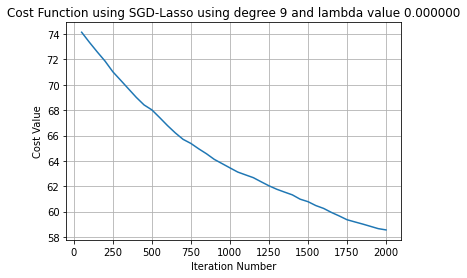

Iteration: Error Value:
50         177.4183435338827
100         176.08120001500953
150         174.36710542095918
200         172.5532056072785
250         170.7984716601301
300         169.17045628566785
350         167.99085509930043
400         166.5732945458429
450         165.44124716332945
500         164.31236369591338
550         162.87842219764906
600         161.87977285915426
650         160.51508053873178
700         159.37064745914395
750         158.5509893400865
800         157.57594104840595
850         156.59616826712025
900         155.29304706273427
950         154.18239173555517
1000         153.41827019151026
1050         152.56092844022473
1100         151.7888419910684
1150         151.14938567225474
1200         150.45276002612079
1250         149.60158399158655
1300         148.87446370809545
1350         148.03320991458332
1400         147.4596273255462
1450         146.77793616931902
1500         146.05449747373945
1550         145.53426768156123
1600       

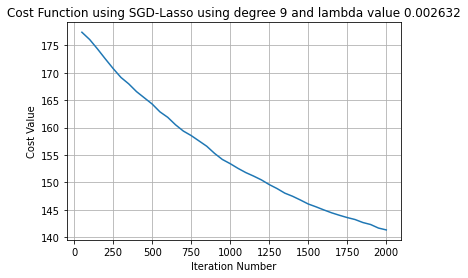

Iteration: Error Value:
50         172.15490381240028
100         170.4733131902515
150         168.28043593285432
200         166.7997149515136
250         165.3621234296002
300         163.80064190644887
350         162.32448167566676
400         160.6376527425937
450         159.57646684058466
500         158.37264461932637
550         157.168418741764
600         156.30179420408848
650         155.35332041584687
700         154.4241083613913
750         153.2663233745173
800         152.53406946553744
850         151.68822873608366
900         151.1359093281522
950         150.3236971381306
1000         149.51053770455124
1050         148.77870306268937
1100         148.19293410505952
1150         147.41149906006652
1200         146.72204353005364
1250         145.92541899072214
1300         145.49454212409503
1350         144.8705235831164
1400         144.16953281619018
1450         143.77308255302964
1500         143.22515509202597
1550         142.5142946249679
1600         141

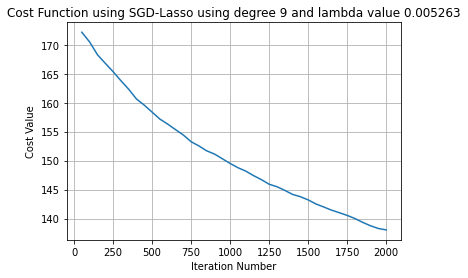

Iteration: Error Value:
50         172.92944381978316
100         171.49312164456444
150         170.48638724406064
200         169.30059103001983
250         167.5709475604114
300         166.2509880431664
350         164.78363117703793
400         163.69645203177902
450         162.65981949787408
500         161.2320861512833
550         160.01109783490242
600         159.25235245799902
650         158.02600070835803
700         157.12262429508027
750         156.07529348853487
800         154.83984548458668
850         153.9745636656524
900         153.22169876849833
950         152.30942573403735
1000         151.3947965979698
1050         150.55700010770394
1100         149.47172687140633
1150         148.7940048212672
1200         148.37599577121085
1250         147.76731186867406
1300         147.0492239505699
1350         146.495448663946
1400         145.81728537043887
1450         145.35546931339496
1500         144.8784988946087
1550         144.50136357038934
1600         1

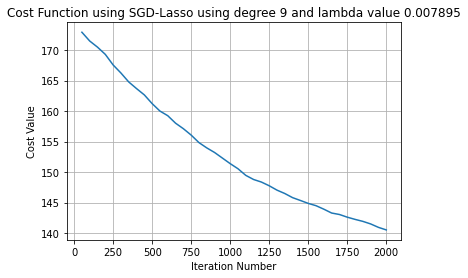

Iteration: Error Value:
50         174.40557158539562
100         172.7255041273604
150         171.85817907196724
200         170.6585369205237
250         169.48757274716462
300         167.67769822308694
350         166.392986283252
400         165.17690565590675
450         163.80265965396754
500         162.82066380395244
550         162.13973650548385
600         161.14053018860739
650         160.03277691039528
700         158.97292674756895
750         157.7312762949078
800         156.98265699036213
850         156.07940512795204
900         155.06627123651117
950         154.05351850834097
1000         153.50574941243443
1050         152.76446192941913
1100         151.7520276599303
1150         151.22872293432917
1200         150.75687464993192
1250         150.25487141811556
1300         149.58511985406975
1350         148.85261191063782
1400         148.09848338914838
1450         147.61452641647816
1500         146.9020723425256
1550         146.2586329846829
1600        

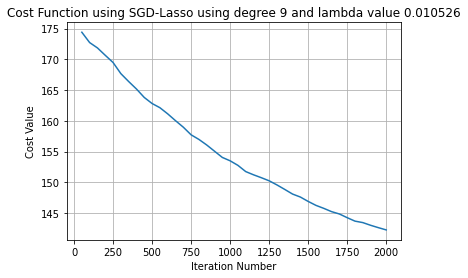

Iteration: Error Value:
50         174.9167198891001
100         173.49283625704203
150         171.70526641037065
200         170.26423051666853
250         168.67481740080018
300         167.32718560421617
350         166.40671780723193
400         164.9831909636358
450         163.93029826685864
500         163.08817944685796
550         162.15245799071246
600         161.29788412105634
650         160.08292101362306
700         158.9616228303515
750         157.78903729598417
800         156.79680629975743
850         155.55582454861016
900         154.73206752670043
950         153.70683126531864
1000         153.30651373566113
1050         152.53193454274046
1100         151.72797113249368
1150         151.14774384200965
1200         150.45129502522198
1250         149.90012477121087
1300         148.9341595643801
1350         148.39061911972348
1400         147.97342756223722
1450         147.23415577996664
1500         146.43724780252026
1550         146.02384838354703
1600    

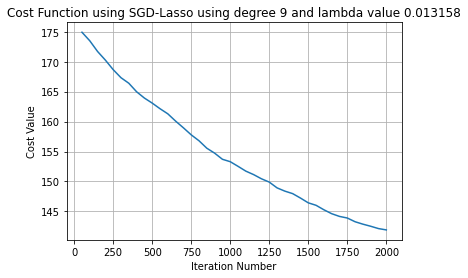

Iteration: Error Value:
50         174.2505219595793
100         173.10907132279482
150         171.7219044185609
200         170.60678664568155
250         169.32118933480794
300         167.86471194380005
350         166.49825976217085
400         165.6458954491337
450         164.75343893022838
500         163.7507563652232
550         162.78696204013886
600         161.40887164433673
650         160.78602626296714
700         159.67011851793023
750         158.6394782385372
800         158.06261429306227
850         157.09772710291597
900         156.70119286947906
950         155.94228722149947
1000         155.38239641097923
1050         154.417182893656
1100         154.08924512455454
1150         153.3743013636792
1200         152.74028434198883
1250         152.16224843388264
1300         151.67571751662396
1350         150.9238373661929
1400         150.58443747102964
1450         150.25192632326755
1500         149.84538217944953
1550         149.48070594532857
1600         

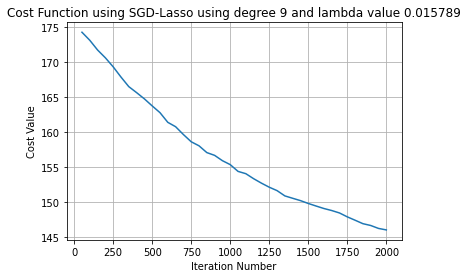

Iteration: Error Value:
50         178.17161479466637
100         176.5543669108439
150         175.2922726353124
200         174.1682944550808
250         172.89471398139312
300         171.69110779279356
350         170.6979894659571
400         169.8664456050055
450         169.03248527751637
500         168.2274634010366
550         167.1645470192951
600         166.2785453517925
650         165.31351408388508
700         164.74310070253992
750         164.3264517133861
800         163.3643336231631
850         162.59165093206664
900         161.81754255277565
950         161.20309671482866
1000         160.3792316037093
1050         159.66785549128443
1100         159.33366733467204
1150         158.88285032819593
1200         158.09868763785965
1250         157.59961793849746
1300         156.8948841939071
1350         155.8394876317752
1400         155.27588386181733
1450         154.8597103518812
1500         154.43327020652066
1550         153.9191444326408
1600         153.35

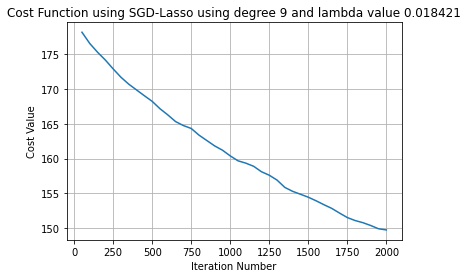

Iteration: Error Value:
50         178.1075298303817
100         176.61141986853548
150         175.28238494434754
200         174.5046781833491
250         173.22432667387795
300         171.9237901905698
350         170.49434446726775
400         169.15202629344927
450         168.25764061328067
500         167.24580482941593
550         166.2276362638986
600         165.15321664367167
650         164.2791744998234
700         163.40329367676597
750         162.62100690171744
800         162.2385441522972
850         161.49414303782427
900         161.18647936103588
950         160.24823810365322
1000         160.114733875431
1050         159.4718451054872
1100         158.8159860207644
1150         158.247998781725
1200         157.8992162790721
1250         157.4805312290862
1300         157.10056949110688
1350         156.5602128108975
1400         156.0455828323028
1450         155.84844417866006
1500         155.42384996595277
1550         154.64870174612645
1600         154.365

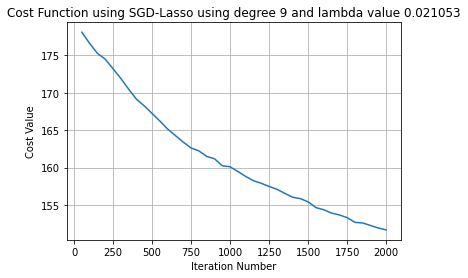

Iteration: Error Value:
50         179.30540331723623
100         178.04823144079407
150         177.34054672418137
200         176.18723298939648
250         175.0291447273672
300         173.91134875132926
350         173.2286214588817
400         172.0806930954295
450         171.36491280854054
500         170.51282668285398
550         169.43316816347482
600         168.72032369958933
650         167.70297626662455
700         166.76398723804147
750         165.92047610390432
800         165.0080193947562
850         164.40196064971647
900         163.75333738706263
950         163.47196302184966
1000         162.6671315183563
1050         162.25308370980827
1100         161.4030227188361
1150         161.0682496597104
1200         160.55545410062132
1250         159.86539964564946
1300         158.88413049223516
1350         158.11718097149435
1400         157.66236718259466
1450         157.48832651739218
1500         156.83337807834027
1550         156.6233169369523
1600        

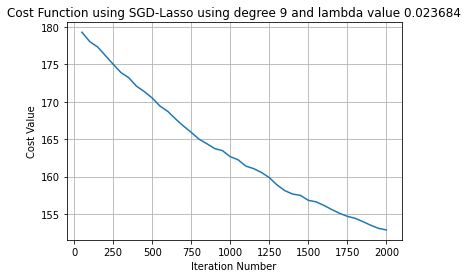

Iteration: Error Value:
50         179.26153188493683
100         178.04586325146082
150         176.94791687715772
200         175.96327779322533
250         174.8107944119124
300         173.83477258804803
350         172.40557699610747
400         171.43323956579857
450         170.73213684795056
500         169.52971562625828
550         169.1147682219132
600         168.0978442451889
650         167.54836645681732
700         167.01505316255393
750         166.3989992741129
800         166.15957012747393
850         165.60029150612584
900         165.0083631188479
950         164.6269433520329
1000         164.26915089071318
1050         163.53899631218923
1100         162.7013701938771
1150         162.29111486697934
1200         161.88841432499993
1250         161.35451103810848
1300         161.0773133433064
1350         160.61294448986797
1400         159.94652780166595
1450         159.3985229955753
1500         159.16422934487792
1550         158.93373151515326
1600         

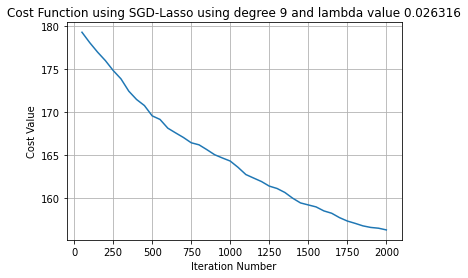

Iteration: Error Value:
50         182.5637018751657
100         181.37717930954196
150         179.9924307626026
200         179.28984780337848
250         178.5357170379414
300         177.75736137075478
350         177.1982907496632
400         176.5008085618455
450         175.50291298517382
500         174.08197726043213
550         172.82967364460023
600         171.70832249345443
650         170.97432333303894
700         170.45410468844088
750         169.696290424284
800         169.08151992356966
850         168.6595043642126
900         168.2683803308901
950         167.6755208099715
1000         167.05415588202467
1050         166.40261150940086
1100         165.9221691585879
1150         165.7105184280851
1200         165.38890921429137
1250         165.18870744903634
1300         164.66538338914054
1350         164.66254492144694
1400         164.48647085809588
1450         163.88442081478223
1500         163.63057087712065
1550         163.21447365270646
1600         162

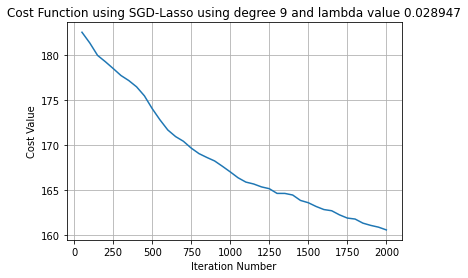

Iteration: Error Value:
50         183.83450423626823
100         182.84579118882374
150         181.62699303492755
200         180.39691594072565
250         179.2166560614452
300         178.12726847965513
350         177.69916991624967
400         176.64927595745203
450         176.18089963865
500         175.5865721100628
550         175.11868785068748
600         174.60692050392015
650         173.71919139434027
700         172.818715407663
750         172.29811328584603
800         172.06826807990095
850         171.67047083345975
900         171.48959001460832
950         171.2068137051567
1000         170.74711867790668
1050         170.3134854364866
1100         169.97283207389162
1150         169.29689027946992
1200         168.7595121170212
1250         168.29807620915713
1300         168.27787457152303
1350         167.64591115380836
1400         167.1892049586283
1450         166.84998905194263
1500         166.81286273453307
1550         166.14666212208874
1600         16

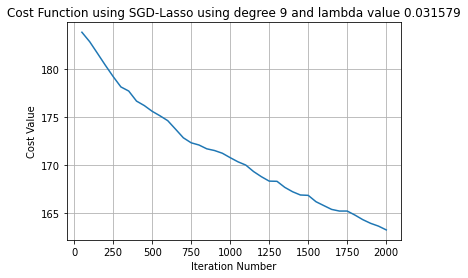

Iteration: Error Value:
50         184.45812212008755
100         182.7896759705669
150         181.88368891042512
200         180.64388887628516
250         179.78831540070396
300         179.0439136476575
350         178.38871407263161
400         177.76051737749603
450         176.81937901860803
500         175.99128856457762
550         175.0233231510288
600         174.15736127093095
650         174.14843671128577
700         173.39256444647654
750         172.5054755970114
800         171.37581187110808
850         171.22736126273023
900         170.25355646248323
950         169.25028369645747
1000         168.38360051315888
1050         168.08844400246966
1100         167.6853169301297
1150         167.70199113570578
1200         167.04404440922875
1250         166.8624888597729
1300         166.31824811667272
1350         166.11773528354868
1400         165.7252924358678
1450         165.61722106176813
1500         165.09821978943492
1550         164.97647810808851
1600       

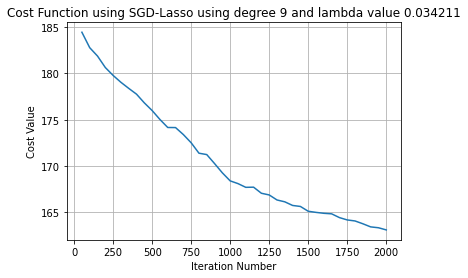

Iteration: Error Value:
50         184.00429610240363
100         183.4864559740527
150         182.24952968563125
200         181.1242154076394
250         180.25090684090887
300         179.03090563874466
350         178.2314536017007
400         177.57742839936034
450         176.860504592734
500         176.62109783713427
550         176.4822682627166
600         175.8178365269899
650         175.2738076328519
700         174.6364908419647
750         174.03179104628782
800         173.95080987134781
850         172.97766177907843
900         172.42581497390444
950         172.2542008466368
1000         171.78633363699095
1050         171.288856876713
1100         170.98082953395382
1150         170.80623327149104
1200         170.56771895760895
1250         170.20330850110508
1300         169.84413215018043
1350         169.4719006958576
1400         169.00627098883947
1450         168.8139994621986
1500         168.4710472320782
1550         168.38363825616892
1600         167.97

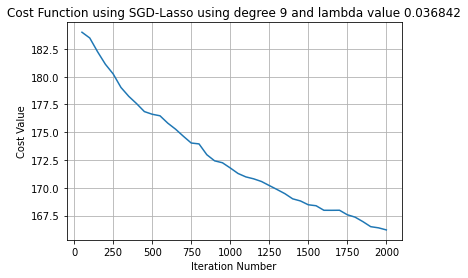

Iteration: Error Value:
50         186.0902965843641
100         185.13323253955753
150         184.42175138456082
200         183.56301872356235
250         182.9881829241593
300         182.310911215477
350         181.4185871562127
400         180.86852165419825
450         179.8456663610964
500         179.0549504566515
550         178.50844819437853
600         177.3771820400311
650         177.0770505140888
700         176.89271503491946
750         176.21702580139066
800         175.42484726731757
850         174.89179068023014
900         174.50246642341767
950         173.81854370165618
1000         173.7630051695982
1050         173.6996176626698
1100         173.40934393831904
1150         172.90272090454246
1200         172.9804359779624
1250         172.85252917753564
1300         171.9902551829336
1350         171.68384326009948
1400         171.4588383386336
1450         171.4429351559581
1500         170.80652839333098
1550         170.6824585137627
1600         170.550

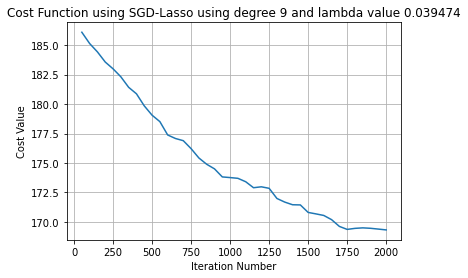

Iteration: Error Value:
50         187.14668298765898
100         186.14272898789872
150         185.19988667140063
200         184.67001160174465
250         183.82584545967092
300         182.68958614062873
350         182.22049619374357
400         181.95742469711288
450         181.3836759145389
500         181.0638033308535
550         180.77870175407932
600         180.5222244937812
650         179.78326523510918
700         179.14261634920243
750         178.7070075343984
800         178.3704564948251
850         177.86322594153668
900         177.18568819792702
950         177.0644486444539
1000         176.44133216634157
1050         175.44457646915478
1100         175.32338144422496
1150         175.32861188160882
1200         175.0747084461442
1250         174.86809437890636
1300         174.86509836164007
1350         175.08933953019095
1400         174.65375184753606
1450         173.8925202669815
1500         173.84719320989498
1550         173.39666489963798
1600        

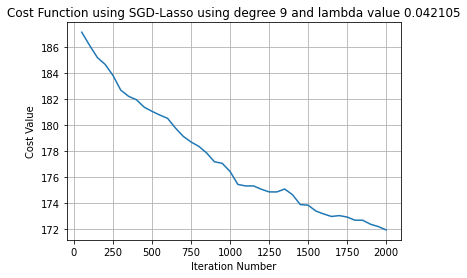

Iteration: Error Value:
50         188.55679368765857
100         187.7031648722165
150         186.82662967885167
200         186.44169128086435
250         186.00571123782578
300         184.79225240569585
350         184.47407253663246
400         184.10473778465138
450         183.2470013997832
500         182.8557346714781
550         182.4068686110355
600         181.7863747086573
650         181.29203733666333
700         180.89656238812117
750         180.72666654651167
800         180.4383792748793
850         180.31731444907882
900         179.41847404053746
950         178.68388405752466
1000         178.62388342756427
1050         178.01531929081543
1100         177.57582928821515
1150         177.2584105409222
1200         177.16380024074743
1250         176.7185318550997
1300         176.70464472122367
1350         176.61246036761463
1400         176.59583446486874
1450         176.62640503195607
1500         176.49783942742846
1550         176.0519335315771
1600         

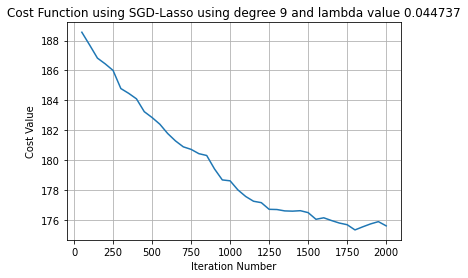

Iteration: Error Value:
50         190.30099693817337
100         189.2877300167215
150         187.79067417218693
200         187.1314608319304
250         186.5485319123254
300         185.90254686983874
350         185.14071955315077
400         184.5381260685393
450         183.91840772270848
500         183.28419866845533
550         182.75826648426937
600         182.12564876611046
650         181.81765084257052
700         181.47363530350194
750         181.14386445828796
800         180.6031678286873
850         180.22574140385848
900         179.43054831835937
950         179.32014194619694
1000         178.95322850928102
1050         178.5388439709007
1100         178.6293143819322
1150         178.74583937084998
1200         178.3105413907652
1250         178.62492429322916
1300         178.3255922579625
1350         178.01182642125724
1400         177.81481617995237
1450         177.88855310690727
1500         177.78257250463264
1550         177.602554980063
1600         17

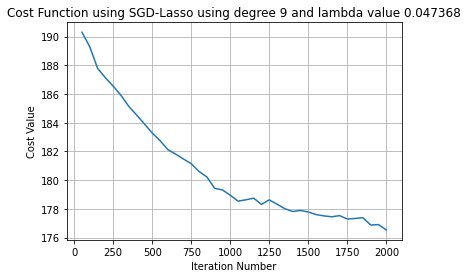

Iteration: Error Value:
50         189.17790399885592
100         188.77520914806774
150         187.53785560276938
200         186.99354893608862
250         186.30014119286378
300         185.95323405909122
350         185.81023066914724
400         185.3697360949075
450         184.3507232582692
500         183.945089912175
550         183.693789621955
600         183.04252152061062
650         182.72676856249552
700         182.52181488458265
750         182.08141776723195
800         182.0643618951698
850         182.19963059967677
900         181.8211701707154
950         182.02528881739414
1000         182.04612080164623
1050         181.68895618102275
1100         181.48470413070262
1150         181.22809444691927
1200         181.59169745975322
1250         181.42943486379983
1300         181.39551996160884
1350         181.31814045796193
1400         181.28487789101266
1450         180.7820210669731
1500         180.3800398751255
1550         180.4623164826448
1600         18

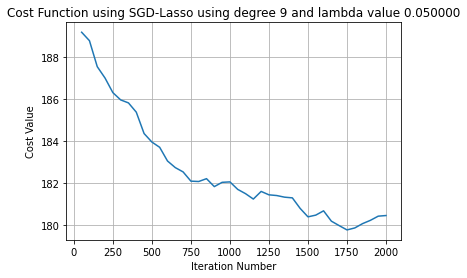

Lambda Values:  [0.         0.00263158 0.00526316 0.00789474 0.01052632 0.01315789
 0.01578947 0.01842105 0.02105263 0.02368421 0.02631579 0.02894737
 0.03157895 0.03421053 0.03684211 0.03947368 0.04210526 0.04473684
 0.04736842 0.05      ]
RMSE for Training Data:  [0.3184298512097022, 0.4945357316379501, 0.4886355686079795, 0.4929107755107501, 0.4958385938539579, 0.49509210330785475, 0.5022752882480224, 0.5084395334204462, 0.5116535813898614, 0.513605088211727, 0.519244667325577, 0.5264065593554502, 0.5305962964019483, 0.530282285489588, 0.5353415397835662, 0.5402884702723654, 0.5444162348904031, 0.5501851086049957, 0.5514945838356398, 0.5576071645121057]
RMSE for Testing Data:  [0.5575401977375465, 0.5487246884882854, 0.5502227007094092, 0.5520454778017203, 0.5527514409756416, 0.551704499050197, 0.5570729635869877, 0.5576252873442196, 0.5594361720454945, 0.5594122235091588, 0.5632522124947156, 0.5655203826332789, 0.5667907791945703, 0.5657308122173281, 0.5698150421680445, 0.570459286

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


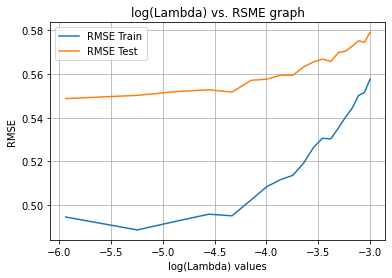

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


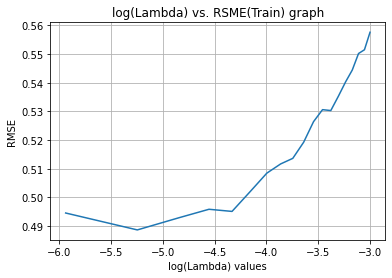

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log


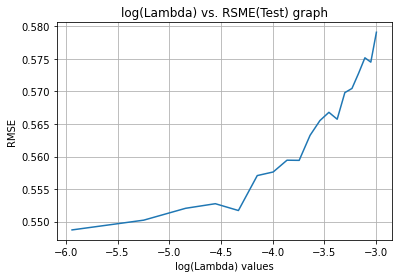

In [ ]:
import matplotlib.pyplot as plt 
arrRMS_train = []
arrRMS_test = [] 
eta = 0.1 #Learning rate
arr = np.linspace(0,0.05,20)
print(arr)
deg = 9
for i in arr: 
  [x,y] = Stochastic_GD_lasso(deg, eta, i)
  arrRMS_train.append(x)
  arrRMS_test.append(y)

print("Lambda Values: ", arr)
print("RMSE for Training Data: ", arrRMS_train)
print("RMSE for Testing Data: ", arrRMS_test)
print("Minimum RMSE Train: ", min(arrRMS_train))
print("Minimum RMSE Test: ", min(arrRMS_test))

print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_train)
plt.plot(np.log(arr), arrRMS_test)
plt.title("log(Lambda) vs. RSME graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.legend(["RMSE Train", "RMSE Test"])
plt.show()


print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_train)
plt.title("log(Lambda) vs. RSME(Train) graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.show()



print("                                                        ") 
plt.figure()
plt.grid()
plt.plot(np.log(arr), arrRMS_test)
plt.title("log(Lambda) vs. RSME(Test) graph")
plt.xlabel("log(Lambda) values")
plt.ylabel("RMSE")
plt.show()

# **Surface Plots using Axes3D Gradient Descent Algorithm (Degrees 0-9)**

In [ ]:
def gradientDescent3DPlot(deg, eta):
  X = np.array(featureVector(trdata, deg))
  Xtest = np.array(featureVector(tsdata, deg))
  #X.shape = 3*1155
  W = np.zeros((int((deg+1)*(deg+2)/2),1))
  count = 0
  pE = 100000 #Error from previous iteration. 
  E = 10000 #Error from current iteration. 
  #Iterate till convergence. 
  while abs(E-pE)>0.001:
    count = count+1 #Counts number of iterations. 
    pE = E 
    Yp = np.dot(X.T, W) #Predicted value
    W = W - ((eta/m)*np.dot(X, (Yp-y)))
    E = compute_cost(W, X, y) #Current iteration's error
  Etest = compute_cost(W, Xtest, ytest)
  return [W,Yp]

Degree 0 - Gradient Descent


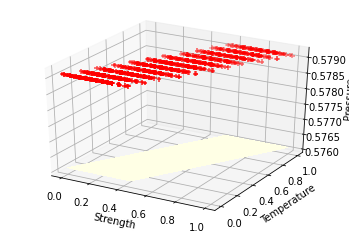

Degree 1 - Gradient Descent


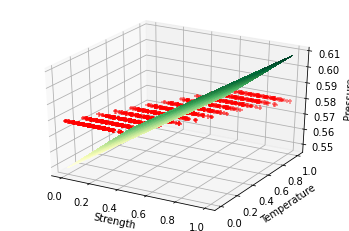

Degree 2 - Gradient Descent


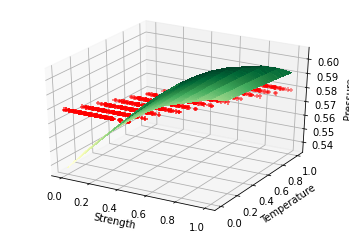

Degree 3 - Gradient Descent


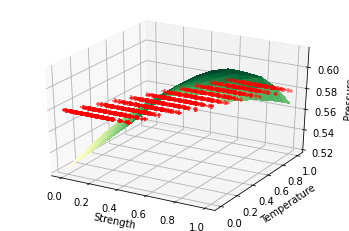

Degree 4 - Gradient Descent


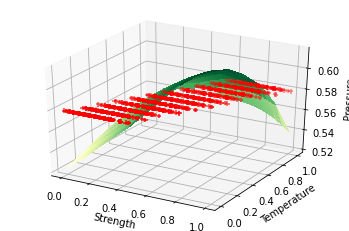

Degree 5 - Gradient Descent


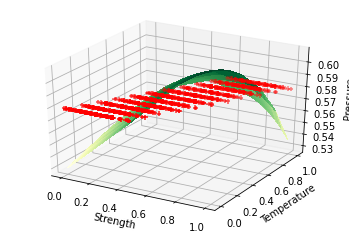

Degree 6 - Gradient Descent


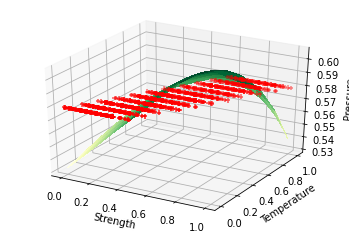

Degree 7 - Gradient Descent


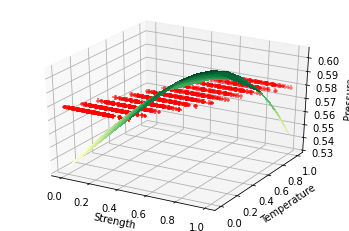

Degree 8 - Gradient Descent


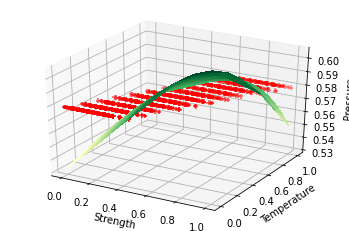

Degree 9 - Gradient Descent


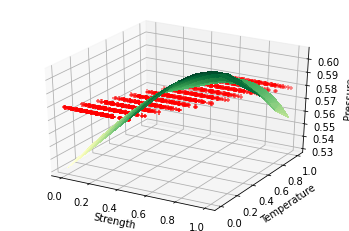

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
eta = 0.1 #Learning rate
for deg in range(0, 10):
  [W,Y_pred_train] = gradientDescent3DPlot(deg, 0.1)
  degreeStr = 'Degree ' + str(deg) + ' - Gradient Descent' 
  print(degreeStr)
  ax = plt.figure(deg).gca(projection="3d")
  ax.set_xlabel('Strength') 
  ax.set_ylabel('Temperature') 
  ax.set_zlabel('Pressure')
  ax.scatter(X[:,0], X[:,1], y.flatten(), color='red', marker='+') #ploting points
  ax.plot_trisurf(X[:,0], X[:,1], Y_pred_train.flatten(), linewidth = 0.2, cmap="YlGn", antialiased=False) #ploting the surface
  plt.show()